 # **<font color='blue'/>Importation des packages et chargement des données**

---



Importation des packages

In [1]:
pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 23.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=b42daf019e37748c92d2e1612e532f94503347b0c06b931c02d62866e5f2af28
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [2]:
pip install yellowbrick

     |████████████████████████████████| 274 kB 10.9 MB/s 


In [3]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import nltk
from nltk import word_tokenize
from collections import defaultdict
from nltk.corpus import stopwords, wordnet
from nltk.stem.snowball import FrenchStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.cluster import KMeansClusterer, euclidean_distance

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer

import gensim
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.phrases import Phraser, Phrases

import warnings

import tensorflow
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, LSTM, Embedding,Bidirectional
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import img_to_array
from keras.layers import LSTM
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imutils import paths
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3

import cv2

from keras.applications.vgg16 import VGG16

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, classification_report, ConfusionMatrixDisplay

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.datasets import make_blobs

from tensorflow.keras.optimizers import RMSprop

import gensim.corpora as corpora

import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import datetime as dt
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

import wordcloud
from wordcloud import WordCloud

import gensim.downloader as api

import os,shutil
import cv2
from urllib import request
import glob
import pickle

import zipfile as zf
import tarfile

from PIL import Image
import io, bson, multiprocessing
from IPython.core.display import display,HTML

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1

chargement des données

In [4]:
request.urlretrieve ("https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip", "Dataset+projet+prétraitement+textes+images.zip")

('Dataset+projet+prétraitement+textes+images.zip',
 <http.client.HTTPMessage at 0x7fb5b1f2b5d0>)

Dézipper le fichier zip contenant les données dans le dossier "Data_P2" :

In [5]:
with zf.ZipFile('Dataset+projet+prétraitement+textes+images.zip', 'r') as f:
  f.extractall()

Lire les fichiers csv importés, et les affecter à des DataFrames :

In [6]:
df_flipkart = pd.read_csv("Flipkart/flipkart_com-ecommerce_sample_1050.csv")

Répertoire des images

In [7]:
img_path = r"Flipkart/Images/"

# **<font color='blue'/>Nettoyage des données**

---



Afficher Dataframe

In [8]:
pd.set_option('display.max_colwidth', 50)
df_flipkart.head()

uniq_id  ...                             product_specifications
0  55b85ea15a1536d46b7190ad6fff8ce7  ...  {"product_specification"=>[{"key"=>"Brand", "v...
1  7b72c92c2f6c40268628ec5f14c6d590  ...  {"product_specification"=>[{"key"=>"Machine Wa...
2  64d5d4a258243731dc7bbb1eef49ad74  ...  {"product_specification"=>[{"key"=>"Material",...
3  d4684dcdc759dd9cdf41504698d737d8  ...  {"product_specification"=>[{"key"=>"Brand", "v...
4  6325b6870c54cd47be6ebfbffa620ec7  ...  {"product_specification"=>[{"key"=>"Machine Wa...

[5 rows x 15 columns]

Afficher les clonnes des DataFrames

In [9]:
df_flipkart.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

Déterminer le nombre de lignes et de colonnes :

In [10]:
df_flipkart.shape

(1050, 15)

Afficher les informations du Datafarme

In [11]:
df_flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Convertir la colonne 'crawl_timestamp' en datetime

In [12]:
df_flipkart['crawl_timestamp'] = df_flipkart['crawl_timestamp'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')
df_flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  1050 non-null   object             
 1   crawl_timestamp          1050 non-null   datetime64[ns, UTC]
 2   product_url              1050 non-null   object             
 3   product_name             1050 non-null   object             
 4   product_category_tree    1050 non-null   object             
 5   pid                      1050 non-null   object             
 6   retail_price             1049 non-null   float64            
 7   discounted_price         1049 non-null   float64            
 8   image                    1050 non-null   object             
 9   is_FK_Advantage_product  1050 non-null   bool               
 10  description              1050 non-null   object             
 11  product_rating           1050 

Les statistiques descriptives des données

In [13]:
df_flipkart.describe()

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

Le taux de valeurs manquantes en %

In [14]:
missing_rate = (df_flipkart.isna().sum()/df_flipkart.shape[0])*100
missing_rate

uniq_id                     0.000000
crawl_timestamp             0.000000
product_url                 0.000000
product_name                0.000000
product_category_tree       0.000000
pid                         0.000000
retail_price                0.095238
discounted_price            0.095238
image                       0.000000
is_FK_Advantage_product     0.000000
description                 0.000000
product_rating              0.000000
overall_rating              0.000000
brand                      32.190476
product_specifications      0.095238
dtype: float64

Graphique du taux de valeurs manquantes

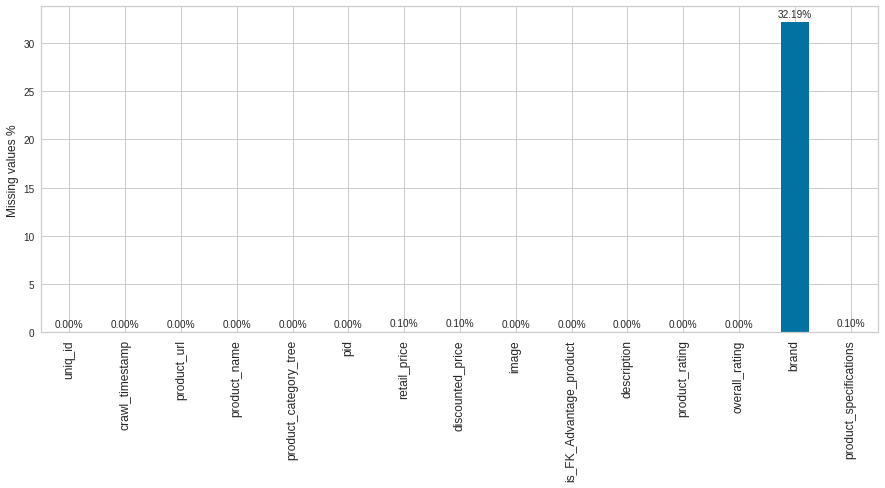

In [15]:
missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(15,6))

ax.set_ylabel("Missing values %", fontsize=12)

plt.xticks(rotation='90', fontsize=12)

plt.legend().set_visible(False)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height()+'%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [16]:
df_flipkart.duplicated().value_counts()

False    1050
dtype: int64

In [17]:
pd.set_option('display.max_colwidth', 300)
df_flipkart[['product_category_tree']]
# df_flipkart[df_flipkart['uniq_id'].duplicated()].sort_values(by='uniq_id', ascending=True)

product_category_tree
0                              ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]
2      ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]
3       ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]
4                ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]
...                                                                                                                                         ...
1045                                                                    ["Baby Care >> Baby & Kids Gifts >> Stickers >> Oren Empower Stickers"]
1046                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]
1047                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]
1048                                                                      ["Baby Care >> Baby & Kids Gifts >> Stickers >> Wallmantra Stickers"]
1049                                                                        ["Baby Care >> Baby & Kids Gifts >> Stickers >> Uberlyfe Stickers"]

[1050 rows x 1 columns]

Séparer les catégories principales

In [18]:
df_category = df_flipkart.copy()
# df_category['product_category_tree']=df_category['product_category_tree'].str.replace('[', '').str.replace('"', '')

df_category.head()


#Créer une nouvelle colonne avec les catégories principales
def categ(data):
    categ=[]
    for i in data:
        if i == ">":
            break
        if  i == "[":
            continue
        if  i == '''"''':
            continue
        if  i == "&":
            continue
        categ.append(i)
    categ ="".join(categ).strip()
    return categ

df_category['main_category']=df_category['product_category_tree'].apply(categ)

# Nombre maximum des catégories
n_cat = df_category['product_category_tree'].str.count(">>").max()

#Créer de nouvelles colonnes pour les sous-catégories
for i in range(1, n_cat) :
  df_category['sub_category_%i' %i]=df_category['product_category_tree'].str.split('>>', expand=True)[i]
  df_category['sub_category_%i' %i] = df_category['sub_category_%i' %i].str.replace(r'(^.*].*$)', 'None')
  df_category['sub_category_%i' %i] = df_category['sub_category_%i' %i].str.replace(" '", '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: FutureWarning: The default value of regex will change from True to False in a future version.


In [19]:
df_category['main_category'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor  Festive Needs', 'Kitchen  Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

Nombre de catégories par colonne

In [20]:
print('main_category  : ',df_category['main_category'].unique().size)
print('sub_category_1 : ',  df_category['sub_category_1'].unique().size)
print('sub_category_2 : ',  df_category['sub_category_2'].unique().size)
print('sub_category_3 : ',  df_category['sub_category_3'].unique().size)
print('sub_category_4 : ',  df_category['sub_category_4'].unique().size)
print('sub_category_5 : ',  df_category['sub_category_5'].unique().size)

main_category  :  7
sub_category_1 :  62
sub_category_2 :  145
sub_category_3 :  163
sub_category_4 :  78
sub_category_5 :  49


Assigner un cnomber à chaque catégorie

In [21]:
df_category['Cluster_cat']=''

def assign_cluster(df):

  df.loc[df.eval("main_category == 'Baby Care'"), "Cluster_cat"]                =0
  df.loc[df.eval("main_category == 'Beauty and Personal Care'"), "Cluster_cat"] =1
  df.loc[df.eval("main_category == 'Computers'"), "Cluster_cat"]                =2
  df.loc[df.eval("main_category == 'Home Decor  Festive Needs'"), "Cluster_cat"]=3
  df.loc[df.eval("main_category == 'Home Furnishing'"), "Cluster_cat"]          =4
  df.loc[df.eval("main_category == 'Kitchen  Dining'"), "Cluster_cat"]          =5
  df.loc[df.eval("main_category == 'Watches'"), "Cluster_cat"]                  =6

  return df

assign_cluster(df_category)


uniq_id  ... Cluster_cat
0     55b85ea15a1536d46b7190ad6fff8ce7  ...           4
1     7b72c92c2f6c40268628ec5f14c6d590  ...           0
2     64d5d4a258243731dc7bbb1eef49ad74  ...           0
3     d4684dcdc759dd9cdf41504698d737d8  ...           4
4     6325b6870c54cd47be6ebfbffa620ec7  ...           4
...                                ...  ...         ...
1045  958f54f4c46b53c8a0a9b8167d9140bc  ...           0
1046  fd6cbcc22efb6b761bd564c28928483c  ...           0
1047  5912e037d12774bb73a2048f35a00009  ...           0
1048  c3edc504d1b4f0ba6224fa53a43a7ad6  ...           0
1049  f2f027ad6a6df617c9f125173da71e44  ...           0

[1050 rows x 22 columns]

Graphique de distribution des catégorie

In [22]:
df_category.groupby("main_category").agg({"uniq_id" : "count"}).reset_index()


main_category  uniq_id
0                  Baby Care      150
1   Beauty and Personal Care      150
2                  Computers      150
3  Home Decor  Festive Needs      150
4            Home Furnishing      150
5            Kitchen  Dining      150
6                    Watches      150

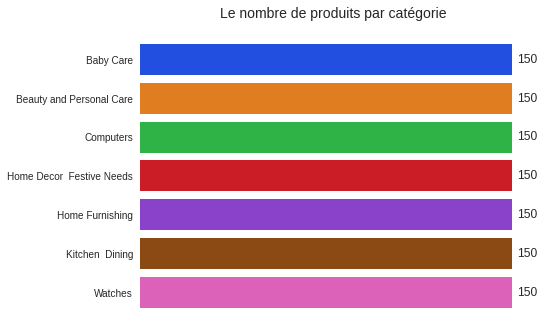

In [23]:
df_product_category = df_category.groupby("main_category").agg({"uniq_id" : "count"}).reset_index()

df_product_category.rename(columns = {"uniq_id":"nombre total"}, inplace=True)

y_values = df_product_category['main_category']
x_values = df_product_category['nombre total']

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots(figsize=(7,5))
# fig.patch.set_facecolor('#F5F2F2')

ax = sns.barplot(x=x_values, y=y_values, data=df_product_category, palette="bright")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

ax.set_title("Le nombre de produits par catégorie \n", fontsize=14)
ax.set_xlabel("")
ax.set_ylabel("")
plt.yticks(fontsize=10)
ax.axes.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)

 # **<font color='blue'/>Création des répertoires par catégorie**

---


Création des répertoire train et test

In [24]:
cat_array = df_category['main_category'].unique()
cat_array

os.mkdir('Data')
os.mkdir('Data/train')
os.mkdir('Data/test')

base_dir ='Flipkart/Images'
train_dir = 'Data/train/'
test_dir = 'Data/test/'

# Création d'un répertoire par catégorie
for i in range (len(cat_array)):
  os.mkdir('Data/train/%s' % cat_array[i])
  os.mkdir('Data/test/%s' % cat_array[i])

#Déplacer chaque image dans son réprtoire de sa catégorie
for i in range (len(cat_array)):
  for j in range(len(df_category['main_category'][df_category['main_category']==cat_array[i]])) :
    if(j<(len(df_category['main_category'][df_category['main_category']==cat_array[0]])*0.9)):
      shutil.copy(base_dir+'/%s' % df_category['image'][df_category['main_category']==cat_array[i]].values[j], train_dir +'%s' % cat_array[i])
      os.rename(train_dir+'/%s' %cat_array[i]+'/'+ df_category['image'][df_category['main_category']==cat_array[i]].values[j], train_dir+'%s' %cat_array[i]+'/'+cat_array[i]+'%i'%j+'.jpg')
    else :
      shutil.copy(base_dir+'/%s' % df_category['image'][df_category['main_category']==cat_array[i]].values[j], test_dir +'%s' % cat_array[i])
      os.rename(test_dir+'/%s' %cat_array[i]+'/'+ df_category['image'][df_category['main_category']==cat_array[i]].values[j], test_dir+'%s' %cat_array[i]+'/'+cat_array[i]+'%i'%j+'.jpg')

# **<font color='blue'/>Prétraitement du texte**

---


## **<font/>Nettoyage du texte - Stopwords - Stemming et Lemmatisation**

---



Mapper la balise POS :

In [25]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Fonction pour lemmatiser la description

In [26]:
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
wnl = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')

stopwords = set(stopwords.words("english"))

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords]
    lemma_words=[wnl.lemmatize(w, get_wordnet_pos(w)) for w in filtered_words]
    return " ".join(lemma_words)




df_category['lemmatizer'] = df_category['description'].apply(preprocess)

Tokenizer le texte de la description lemmatisée

In [27]:
df_category['tokenize'] = df_category.apply(lambda x : w_tokenizer.tokenize(x['lemmatizer']), axis = 1)
df_category['tokenize'].values[0]

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhances',
 'look',
 'interior',
 'curtain',
 'make',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'romantic',
 'love',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'apparance',
 'give',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'design',
 'surreal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'create',
 'special',
 'moment',
 'joyous',
 'beauty',
 'give',


Fonction pour stemmatiser la description

In [28]:
# stemmer = PorterStemmer()
stemmer = EnglishStemmer()

def preprocess_stem(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'[a-zA-Z]\w+\'?\w*')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)




df_category['stemmer'] = df_category['description'].apply(preprocess_stem)

Tokenizer le texte de la description stemmatisée

In [29]:
df_category['tokenize_stem'] = df_category.apply(lambda x : w_tokenizer.tokenize(x['stemmer']), axis = 1)
df_category['tokenize_stem'].values[0]

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'romant',
 'love',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'appar',
 'give',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smooth',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyous',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',


Mettre tous les mots de la colonne df_category['tokenize'] dans une liste

In [30]:
text_total = []
for i in range(len(df_category['tokenize'])) : 
  text_total += df_category['tokenize'].values[i]

Le nombre des mots et de mot unique de la colonne df_category['tokenize']

In [31]:
from collections import Counter

print('Le nombre de mots de la colonne tokenize         ==>', len(text_total))
print('Le nombre de mots uniques de la colonne tokenize ==>', len(set(text_total)))

Le nombre de mots de la colonne tokenize         ==> 53554
Le nombre de mots uniques de la colonne tokenize ==> 4326


## **<font/>Latent Dirichlet Allocation (LDA)**

---

Créer les modèles bigrammes et trigrammes

In [32]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df_category['tokenize'],min_count=2, threshold=100,delimiter=b' ') # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_category['tokenize']], min_count=5, threshold=100, delimiter=b' ')  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram[df_category['tokenize'][0]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'make', 'high', 'quality', 'polyester', 'fabric', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ring', 'make', 'room', 'environment', 'romantic', 'love', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparance', 'give', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'even', 'create', 'special', 'moment', 'joyous', 'beauty', 'give', 'soothe', 'print', 'bring', 'home', 'elegant', 'curtain', 'softly', 'filter', 'light', 'room', 

In [33]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [34]:
# Form Bigrams
df_category['bigram'] = make_bigrams(df_category['tokenize'])
df_category['bigram_trigram'] = make_trigrams(df_category['bigram'])

In [35]:
# Créez un objet de corpora.Dictionary()
id2word = corpora.Dictionary(df_category['bigram'])

text = df_category['bigram']

# l'id du mot et sa fréquence dans chaque document
corpus = [id2word.doc2bow(text) for text in text]

print(corpus[0])

[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 10), (19, 3), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 4), (26, 2), (27, 1), (28, 1), (29, 1), (30, 3), (31, 3), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 2), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 2), (59, 4), (60, 1), (61, 1), (62, 3), (63, 2), (64, 6), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1)]


In [36]:
len(id2word)

4740

Construire le modèle LDA

In [37]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=9,
                                           update_every=2,
                                           chunksize=49,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True
                                            )

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [38]:
# Print the Keyword in the 7 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.067*"laptop" + 0.050*"warranty" + 0.030*"shape" + 0.021*"skin mouse" + 0.017*"usb" + 0.016*"adapter" + 0.015*"pad" + 0.015*"dress" + 0.012*"product" + 0.012*"dial"'), (1, '0.053*"free" + 0.052*"buy" + 0.051*"delivery" + 0.051*"shipping" + 0.051*"genuine" + 0.051*"cash" + 0.051*"product" + 0.041*"flipkart" + 0.040*"day" + 0.040*"com"'), (2, '0.017*"pack" + 0.015*"design" + 0.014*"color" + 0.014*"use" + 0.014*"feature" + 0.013*"material" + 0.013*"box" + 0.012*"model" + 0.011*"light" + 0.011*"number"'), (3, '0.074*"mug" + 0.039*"ceramic" + 0.021*"coffee" + 0.018*"perfect" + 0.018*"sleeve" + 0.017*"gift" + 0.016*"design" + 0.016*"strip" + 0.015*"make" + 0.012*"specification"'), (4, '0.018*"home" + 0.015*"wall" + 0.014*"price" + 0.013*"paper" + 0.012*"apply" + 0.011*"brass" + 0.010*"like" + 0.010*"durable" + 0.009*"water" + 0.008*"make"'), (5, '0.030*"print" + 0.028*"baby" + 0.027*"cotton" + 0.020*"fabric" + 0.018*"detail" + 0.018*"pack" + 0.017*"color" + 0.017*"general" + 0.016*"in

In [39]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis
# pyLDAvis.save_html(vis, 'lda.html')

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.206546  0.014264       1        1  22.572233
1      0.298369  0.186789       2        1  22.099110
5     -0.235860  0.095926       3        1  20.619962
0     -0.011967  0.117002       4        1   9.895809
3      0.019267 -0.148570       5        1   8.617943
4      0.096903 -0.268547       6        1   8.246009
6      0.039834  0.003134       7        1   7.948935, topic_info=         Term        Freq       Total Category  logprob  loglift
205  delivery  549.000000  549.000000  Default  30.0000  30.0000
215  shipping  545.000000  545.000000  Default  29.0000  29.0000
208   genuine  545.000000  545.000000  Default  28.0000  28.0000
202      cash  545.000000  545.000000  Default  27.0000  27.0000
201       buy  560.000000  560.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
207      free   28.764213  624.137742   Topic7  -4.8928  -0.5451
109       men   21.362047  152.100353   Topic7  -5.1903   0.5692
150      soft   17.859265   78.663831   Topic7  -5.3694   1.0495
105     ideal   17.854130  150.890534   Topic7  -5.3697   0.3978
66      print   17.087366  320.940899   Topic7  -5.4136  -0.4008

[394 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.313834       abstract
0         2  0.690435       abstract
2312      4  0.994480        adapter
466       6  0.979702            air
2221      7  0.927801   almond honey
...     ...       ...            ...
250       7  0.049226           work
4634      4  0.950424  would require
1917      7  0.913525           wrap
1443      5  0.981569      year come
1444      5  0.981569      yet fresh

[504 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 6, 1, 4, 5, 7])

Comparer le clustering LDA avec le clusternig de référence "df_category['Cluster_cat']"

In [40]:
# identifier le numéro de topic pour chaque document
def get_max(doc):
        idx,l = zip(*doc)
        return idx[np.argmax(l)]

# Affecter les clusters
cluster=[]
for i in range(len(corpus)):
  x_topic = lda_model.get_document_topics( corpus[i] , minimum_probability = 0.0001 , minimum_phi_value = None , per_word_topics = False )
  cluster.append(get_max(x_topic))

Trouver les clusters dans l'ensemble des données

In [41]:
df_category['Cluster'] = cluster

ARI score suite à la lémmatisation

In [42]:
print('ARI score : ',adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat']))

ARI score :  0.08891540077265062


## **<font/>TF-IDF**

---

Initialiser TfidfVectorizer

In [43]:
tfidf = TfidfVectorizer()
# tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_category['lemmatizer'])

print(X)

  (0, 2329)	0.027137026923643635
  (0, 431)	0.03834658339883038
  (0, 2706)	0.053108811819286575
  (0, 3315)	0.05301460858473767
  (0, 837)	0.030675851143045704
  (0, 2600)	0.026554405909643287
  (0, 464)	0.02510328106917599
  (0, 2156)	0.03819993147742182
  (0, 1069)	0.030466979653053252
  (0, 753)	0.02586946761639406
  (0, 1169)	0.07510457010693429
  (0, 3404)	0.029544437957895922
  (0, 2523)	0.03465899708613578
  (0, 2434)	0.060933959306106504
  (0, 4006)	0.025694229741386992
  (0, 472)	0.026793187588048138
  (0, 1598)	0.02383098896847707
  (0, 3608)	0.022190721652343735
  (0, 3740)	0.07091255267385176
  (0, 127)	0.06793826897153755
  (0, 3229)	0.054272916731150866
  (0, 1608)	0.04162056307370748
  (0, 2173)	0.0397694215264143
  (0, 1439)	0.07091255267385176
  (0, 3562)	0.07510457010693429
  :	:
  (1048, 1700)	0.06550810258979459
  (1048, 3176)	0.06407094961744932
  (1048, 975)	0.06226261108013783
  (1048, 1603)	0.05889537934884951
  (1048, 2644)	0.07236589324977712
  (1048, 541)	0.

In [44]:
# def get_top_keywords(data, clusters, labels, n_terms):
#     df = df_category.groupby(clusters).mean()
    
#     for i,r in df.iterrows():
#         print('\nCluster {}'.format(i))
#         print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
# get_top_keywords(x, 'Cluster_cat', tfidf.get_feature_names(), 10)

Fonction pour calculer le nombre de mots

In [45]:
def word_count(sent):
    word2cnt = dict()
    for word in sent.split():
        if word in word2cnt: word2cnt[word] += 1
        else: word2cnt[word] = 1
    return word2cnt

In [46]:
df_category['lemmatizer'].apply(word_count)

0       {'key': 1, 'feature': 2, 'elegance': 4, 'polyester': 6, 'multicolor': 4, 'abstract': 4, 'eyelet': 6, 'door': 5, 'curtain': 11, 'floral': 1, 'height': 2, 'pack': 3, 'price': 1, 'enhances': 1, 'look': 1, 'interior': 1, 'make': 2, 'high': 1, 'quality': 1, 'fabric': 1, 'style': 1, 'stitch': 1, 'meta...
1       {'specification': 1, 'sathiyas': 3, 'cotton': 3, 'bath': 6, 'towel': 6, 'red': 2, 'yellow': 2, 'blue': 2, 'feature': 1, 'machine': 1, 'washable': 1, 'yes': 1, 'material': 1, 'design': 2, 'self': 1, 'general': 1, 'brand': 1, 'type': 1, 'gsm': 1, 'model': 2, 'name': 1, 'ideal': 1, 'men': 1, 'woman...
2       {'key': 1, 'feature': 2, 'eurospa': 6, 'cotton': 6, 'terry': 4, 'face': 8, 'towel': 11, 'set': 7, 'size': 4, 'small': 2, 'height': 1, 'inch': 3, 'gsm': 2, 'piece': 3, 'assort': 3, 'price': 1, 'brings': 1, 'exclusively': 1, 'design': 2, 'soft': 2, 'export': 2, 'quality': 1, 'product': 3, 'texture...
3       {'key': 1, 'feature': 1, 'santosh': 3, 'royal': 5, 'fashion': 3, 'co

In [47]:
len(tfidf.vocabulary_)

4305

In [48]:
tfidf.vocabulary_

{'key': 2057,
 'feature': 1410,
 'elegance': 1224,
 'polyester': 2890,
 'multicolor': 2491,
 'abstract': 18,
 'eyelet': 1363,
 'door': 1122,
 'curtain': 940,
 'floral': 1482,
 'height': 1767,
 'pack': 2705,
 'price': 2960,
 'enhances': 1258,
 'look': 2219,
 'interior': 1955,
 'make': 2287,
 'high': 1782,
 'quality': 3043,
 'fabric': 1366,
 'style': 3710,
 'stitch': 3668,
 'metal': 2385,
 'ring': 3231,
 'room': 3259,
 'environment': 1277,
 'romantic': 3256,
 'love': 2236,
 'ant': 154,
 'wrinkle': 4261,
 'anti': 158,
 'shrinkage': 3462,
 'elegant': 1225,
 'apparance': 175,
 'give': 1626,
 'home': 1805,
 'bright': 487,
 'modernistic': 2437,
 'appeal': 177,
 'design': 1030,
 'surreal': 3769,
 'attention': 243,
 'sure': 3761,
 'steal': 3652,
 'heart': 1761,
 'contemporary': 835,
 'valance': 4061,
 'slide': 3517,
 'smoothly': 3539,
 'draw': 1132,
 'apart': 170,
 'first': 1452,
 'thing': 3876,
 'morning': 2460,
 'welcome': 4188,
 'sun': 3735,
 'ray': 3097,
 'want': 4155,
 'wish': 4225,
 'good

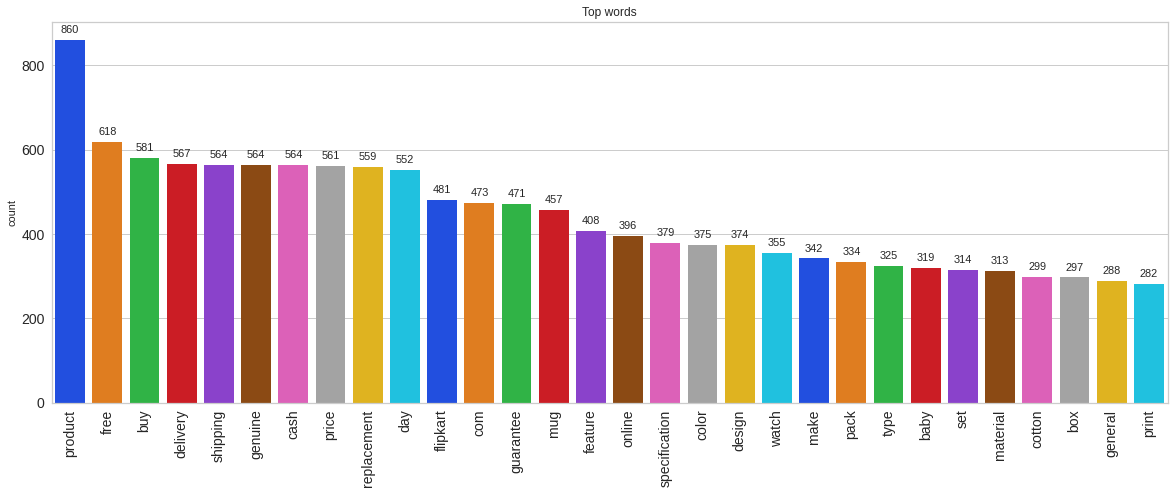

In [49]:
df_category['group'] = 1
df = df_category.groupby(['group'])['lemmatizer'].transform(lambda x : ' '.join(x))[0]
text_total = word_count(df)
word_items = text_total.items()
df_word_repeat = pd.DataFrame(word_items,columns = ['word','count']).sort_values(by='count', ascending = False)
df_word_repeat

fig, ax = plt.subplots(figsize=(20,7))
sns.barplot(x='word', y='count', data=df_word_repeat.head(30), ax=ax, palette='bright')

plt.title('Top words')
plt.xticks(rotation='vertical')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=14)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 11,
                #  rotation='vertical',
                )


Nuages de mots-clés

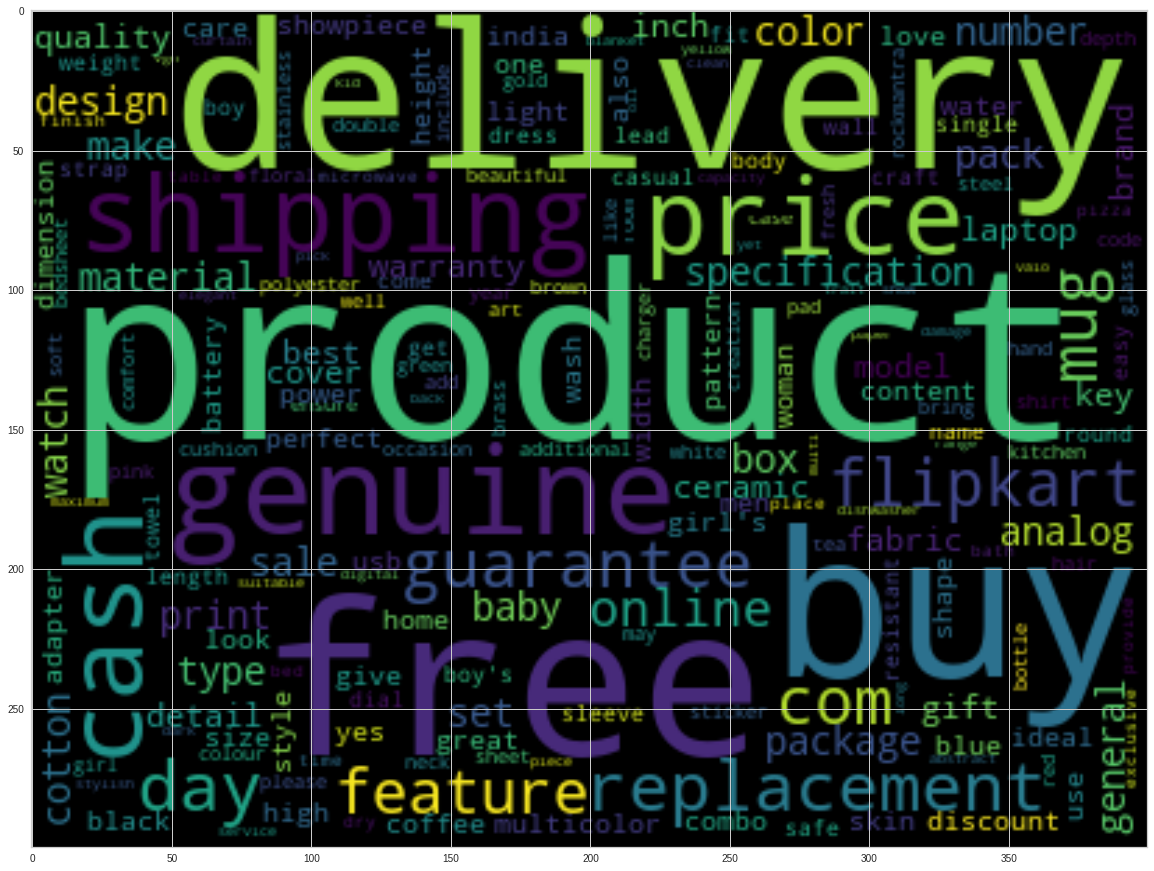

In [50]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud(stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=400, height=300).generate_from_frequencies(text_total)

# plotting the wordcloud
plt.figure(figsize=(20,20), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

Nuages de mots-clés en forme d'ordinateur

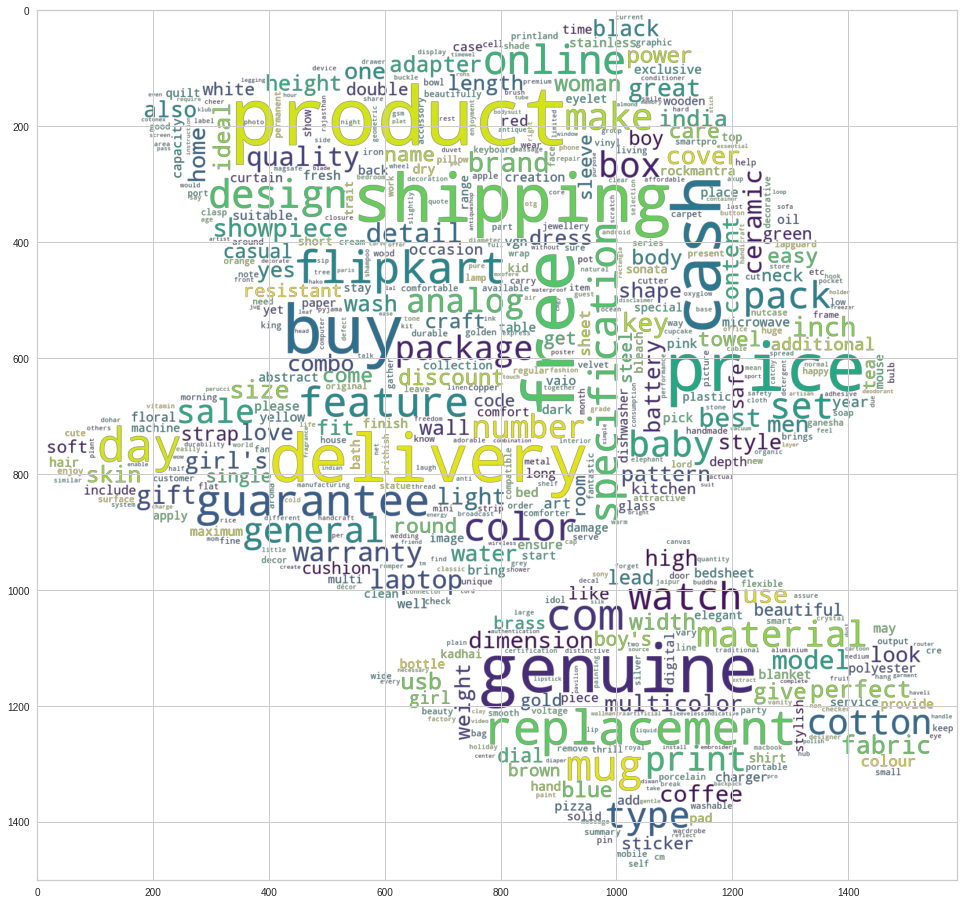

In [52]:
# creation of wordcloud

mask_image = np.array(Image.open(img_path+'7815fb39feb773db944c9f03bbdcbf64.jpg').convert('L'))
# mask_image = resize_image(mask_image, (600, 000))
wcloud_fig = WordCloud(stopwords=set(wordcloud.STOPWORDS),
                        max_font_size=140,
                        min_font_size=8,
                        max_words=1000,
                        width=mask_image.shape[1], 
                        height=mask_image.shape[0],
                        prefer_horizontal=.9,
                        relative_scaling=.52,
                        background_color=None,
                        mask=mask_image,
                        mode="RGBA",
                        ).generate_from_frequencies(text_total)

# plotting the wordcloud
plt.figure(figsize=(22,16), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

Nuages de mots-clés par catégorie

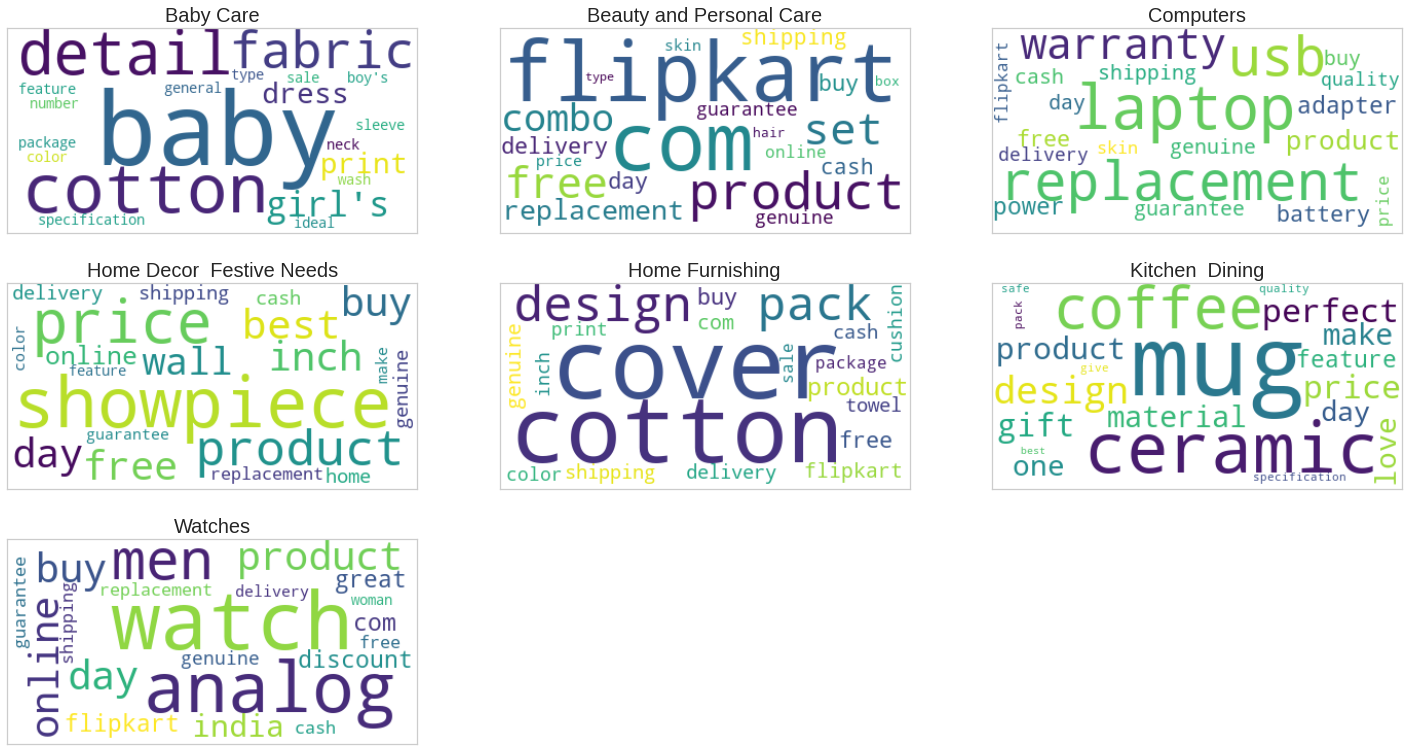

In [51]:
plt.figure(3, figsize=(25,18))
plt.style.use('fast')
for i in range(len(df_category['Cluster_cat'].unique())) :
  df = df_category[df_category['Cluster_cat']==i].groupby(['Cluster_cat'])['lemmatizer'].transform(lambda x : ' '.join(x))[0:1].tolist()[0]
  text_total_cat = word_count(df)
  ### Creating wordcloud
  from wordcloud import WordCloud
  import wordcloud
  # creation of wordcloud
  wcloud_fig = WordCloud(stopwords=set(wordcloud.STOPWORDS),
                        colormap='viridis', max_words=20, background_color="white").generate_from_frequencies(text_total_cat)

  # plotting the wordcloud
  ax = plt.subplot(4, 3, i+1)
  # plt.text(100,-10,df_category[['main_category']][df_category['Cluster_cat']==i].values[0][0],fontsize=18)
  # plt.set_title("The Title")
  plt.title(df_category[['main_category']][df_category['Cluster_cat']==i].values[0][0],fontsize=20)
  plt.imshow(wcloud_fig, interpolation  = 'bilinear')
  # plt.axis('off')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

Le nombre de mots par catégorie

In [53]:
# Le nombre de mot par ligne
df_category['word_length'] = df_category['lemmatizer'].apply(lambda x:len(x.split()))

Data_word_length = df_category.groupby(['main_category']).agg({"word_length" : "sum"}).reset_index()

fig = px.bar(Data_word_length, y='main_category', x='word_length', text_auto='.3s', color = 'main_category',
            title="Le nombre de mots par catégorie")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

Le nombre de mots unique par catégorie

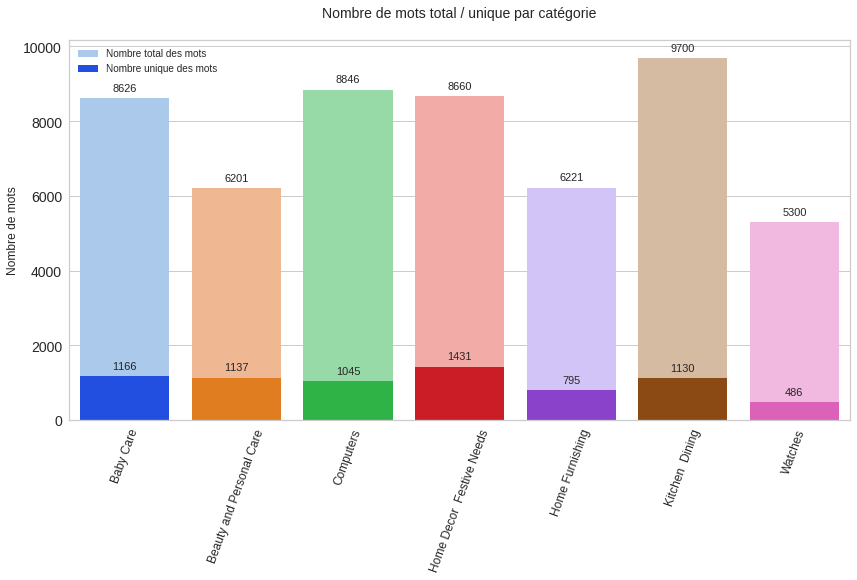

In [55]:
# grouper par catégorie et concaténer les desciptions de la colonne 'lemmatizer'
df = df_category.groupby('main_category')['lemmatizer'].apply(lambda x: "%s" % ' '.join(x))

df = pd.DataFrame(df, columns=['lemmatizer'])
df['nb_word_unique'] = df['lemmatizer'].apply(lambda x:len(np.unique(x.split())))
df = pd.merge(df, Data_word_length, on='main_category', how='right')

x = df['main_category']
y = df['word_length']
y_bis = df['nb_word_unique']

fig, ax = plt.subplots(figsize=(14,7))

sns.barplot(x=x, y=y, data=df, color='blue',label = 'Nombre total des mots', palette='pastel')
sns.barplot(x=x, y=y_bis, data=df, color='red', label = 'Nombre unique des mots', palette='bright')

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 11,
                #  rotation='vertical',
                )

ax.set_ylabel('Nombre de mots', fontsize=12)

plt.xticks(rotation='70', fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('', fontsize=14)

plt.title('Nombre de mots total / unique par catégorie\n', fontsize=14)
plt.legend()

plt.show()

Fréquence des mots par catégorie

Text(0.5, 0, 'Catégorie')

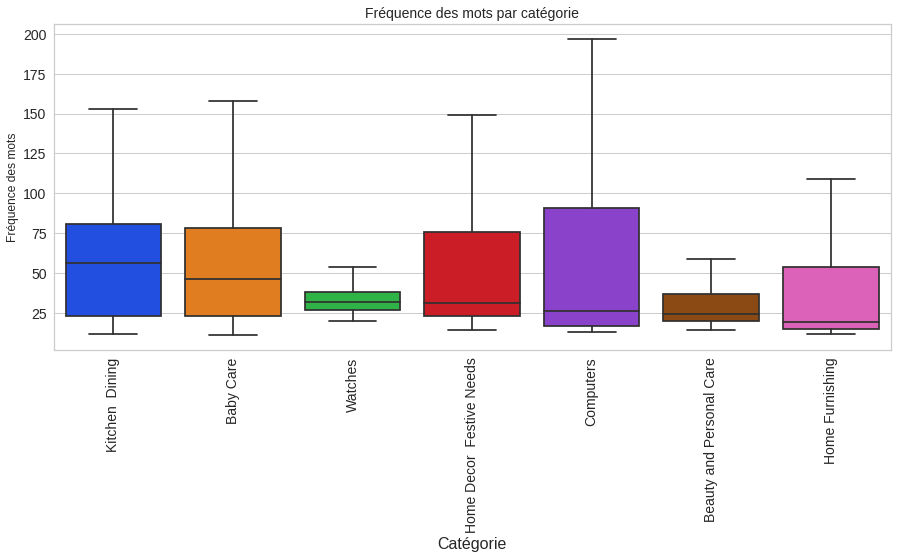

In [56]:
fig, ax = plt.subplots()

grouped = df_category.loc[:,['main_category', 'word_length']] \
    .groupby(['main_category']) \
    .median() \
    .sort_values(by='word_length', ascending=False).head(20)

sns.boxplot(x= 'main_category', y = 'word_length', data = df_category, order=grouped.index, showfliers=False, palette='bright')

fig.set_size_inches(15, 6)
ax.set_ylabel('Fréquence des mots', fontsize=12)
ax.set_title("Fréquence des mots par catégorie", fontsize=14)

plt.xticks(rotation='90', fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Catégorie', fontsize=16)

Le nombre maximum de mots dans une description

In [57]:
df_category['word_length'].max()

355

La moyenne du nombre de mots par catégorie

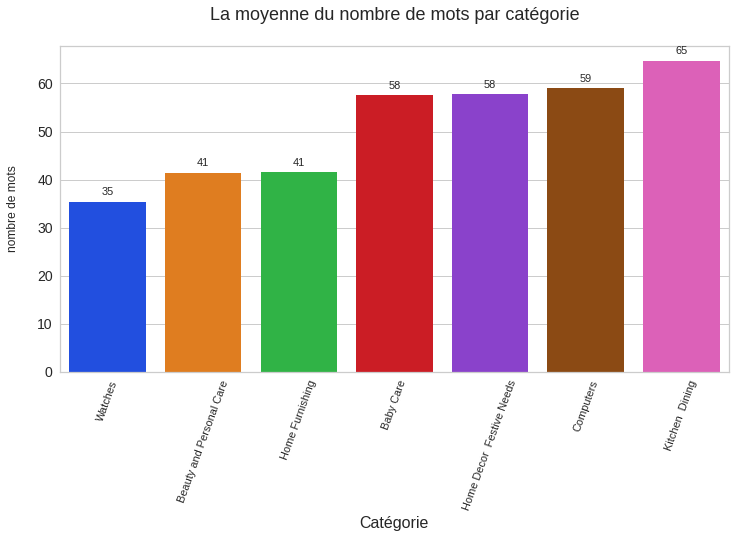

In [58]:
data_mean_word = df_category.copy()

data_mean_word = data_mean_word.groupby(['main_category']).agg({"word_length" : "mean"}).reset_index()
data_mean_word = data_mean_word.sort_values(by='word_length', ascending=True)

x_frequency = data_mean_word['main_category']
y_frequency = data_mean_word['word_length']

fig, ax = plt.subplots(figsize=(12,6))

# ax = sns.lineplot(x= x_frequency, y = y_frequency, data=data_mean_word, palette="pastel",marker='o')
ax = sns.barplot(x=x_frequency, y=y_frequency, data=data_mean_word, palette="bright")

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate("%.0f" % p.get_height(),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 11,
                #  rotation='vertical',
                )

ax.set_ylabel('nombre de mots\n', fontsize=12)

plt.xticks(rotation='70', fontsize=11)
plt.yticks(fontsize=14)
plt.xlabel('Catégorie', fontsize=16)

plt.title('La moyenne du nombre de mots par catégorie\n', fontsize=18)

plt.show()

Créer dataframe tfidf

In [59]:
df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names())
df_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aaa  aapno  aari  aarika  ability  ...  zipper  zone  zoom  zora  zyxel
0     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
2     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
3     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
4     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
...   ...    ...   ...     ...      ...  ...     ...   ...   ...   ...    ...
1045  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1046  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1047  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1048  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1049  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0

[1050 rows x 4305 columns]

Initialiser l'objet

In [60]:
X = df_tfidf.values

X_tsne = TSNE(n_components=2).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Graphique de distribution des catégories

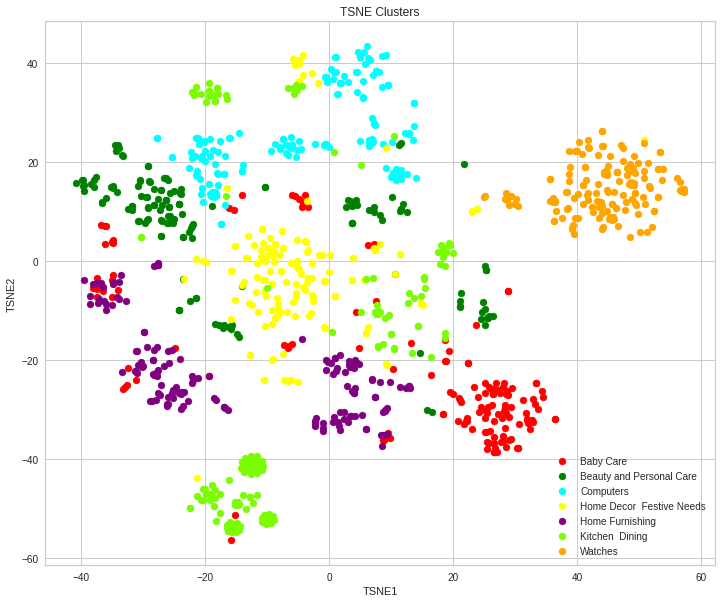

In [62]:
fig = plt.figure(figsize=(12,10))

Colors = ["red", "green", "aqua", 'yellow', 'purple', 'lawngreen', 'orange']

target_name = []
j=[]
for i in range(df_category['Cluster_cat'].unique().size):
  target_name.append(df_category['main_category'][df_category['Cluster_cat']==i].unique()[0])
  j.append(i)

df_category['Color'] = df_category['Cluster_cat'].map(lambda p: Colors[p])

for color, i, target_name in zip(Colors, j, target_name):
  plt.scatter(x = X_tsne[df_category['Cluster_cat']==i,0], y = X_tsne[df_category['Cluster_cat']==i,1], color=color, label=target_name)

plt.legend()
# plt.grid()

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSNE Clusters')



plt.show()

## **<font/>Segmentation K-Means - TF-IDF (Lémmatisation)**

---



In [63]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df_category['lemmatizer'])

In [64]:
df_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names())
df_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aaa  aapno  aari  aarika  ability  ...  zipper  zone  zoom  zora  zyxel
0     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
2     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
3     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
4     0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
...   ...    ...   ...     ...      ...  ...     ...   ...   ...   ...    ...
1045  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1046  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1047  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1048  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0
1049  0.0    0.0   0.0     0.0      0.0  ...     0.0   0.0   0.0   0.0    0.0

[1050 rows x 4305 columns]

Graphique pour identifier le nombre de clusters

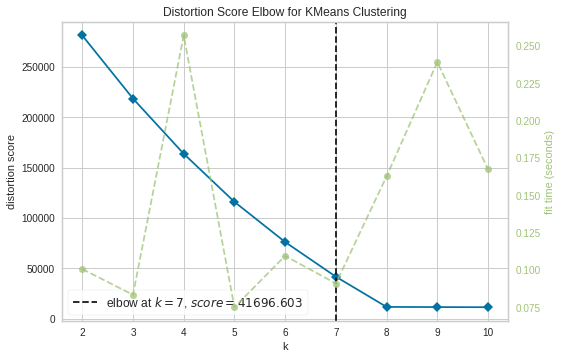

In [65]:
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=0)

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(),K=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Initialiser l'objet TSNE

In [66]:
X = df_tfidf.values

X_tsne = TSNE(n_components=2,random_state=9).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [67]:
# X = df_tfidf.values
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9)
kmeans.fit_transform(X_tsne)

array([[33.749275, 65.71344 , 30.279043, ..., 41.45981 , 28.737392,
        40.445847],
       [14.315623, 88.57299 , 53.099365, ..., 46.04185 , 56.013645,
        57.186214],
       [13.774396, 86.90915 , 52.261234, ..., 44.57829 , 54.53576 ,
        55.52499 ],
       ...,
       [50.76031 , 36.943726, 44.118168, ..., 32.26086 , 17.35693 ,
        15.856885],
       [51.77645 , 36.97517 , 42.30954 , ..., 34.355206, 15.170553,
        17.91934 ],
       [50.90132 , 37.077343, 43.554134, ..., 32.775978, 16.758545,
        16.453867]], dtype=float32)

La distance entre les clusters

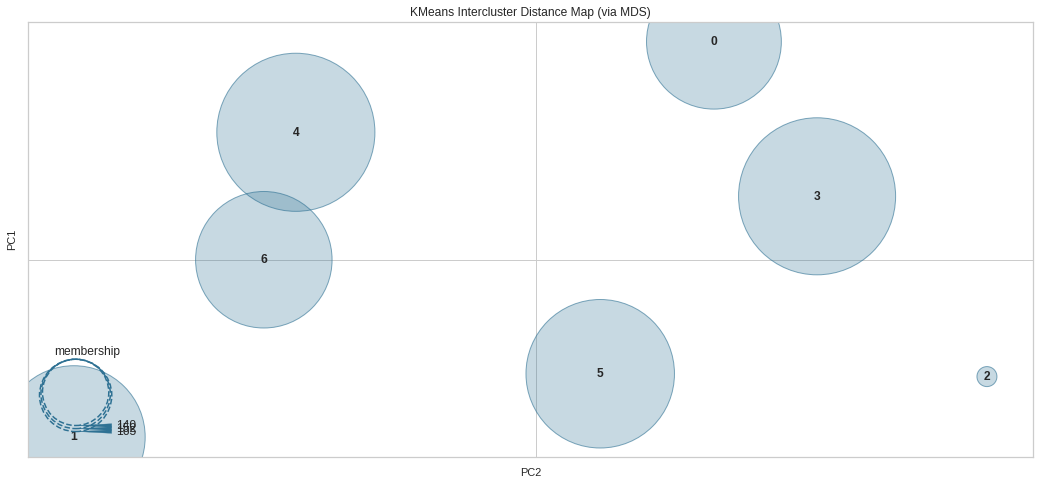

In [68]:
fig = plt.figure(figsize=(18,8))

K = visualizer.elbow_value_
distance_visualizer = InterclusterDistance(kmeans)
distance_visualizer.fit(X_tsne)
distance_visualizer.show()

Trouver les clusters dans l'ensemble des données

In [69]:
df_category['Cluster'] = kmeans.labels_

Projection des données

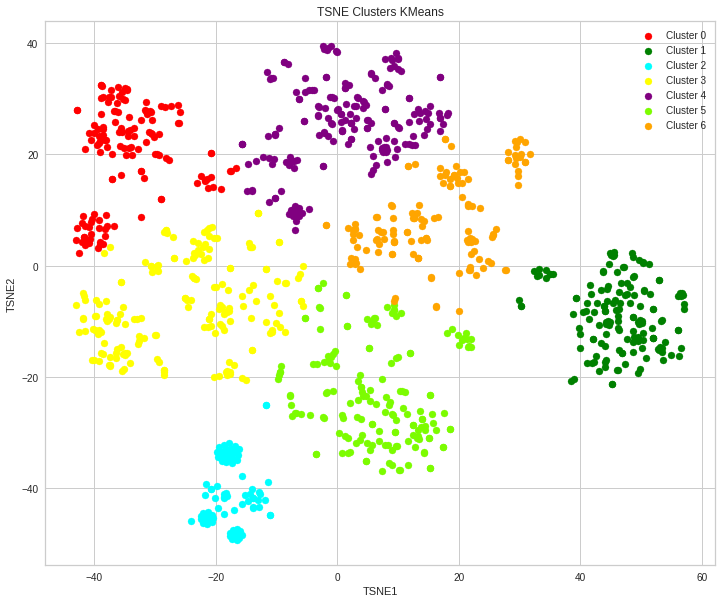

In [70]:
fig = plt.figure(figsize=(12,10))

Colors = ["red", "green", "aqua", 'yellow', 'purple', 'lawngreen', 'orange']

target_name = []
j=[]
for i in range(df_category['Cluster_cat'].unique().size):
  target_name.append('Cluster %i'%i)
  j.append(i)

df_category['Color'] = df_category['Cluster_cat'].map(lambda p: Colors[p])

for color, i, target_name in zip(Colors, j, target_name):
  plt.scatter(x = X_tsne[df_category['Cluster']==i,0], y = X_tsne[df_category['Cluster']==i,1], color=Colors[i], label=target_name)


plt.legend()

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSNE Clusters KMeans')



plt.show()

ARI score suite à la lémmatisation

In [71]:
print('ARI score suite à la lémmatisation : ',adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat']))

ARI score suite à la lémmatisation :  0.5482590338314051


## **<font/>Segmentation K-Means - TF-IDF (Stemming)**

---



In [72]:
tfidf_stem = TfidfVectorizer()

X_stem = tfidf_stem.fit_transform(df_category['stemmer'])

In [73]:
df_tfidf_stem = pd.DataFrame(X_stem.toarray(), columns=tfidf_stem.get_feature_names())
df_tfidf_stem

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aaa  aapno  aari  aarika  abil  ...  zipper  zone  zoom  zora  zyxel
0     0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
1     0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
2     0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
3     0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
4     0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
...   ...    ...   ...     ...   ...  ...     ...   ...   ...   ...    ...
1045  0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
1046  0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
1047  0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
1048  0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0
1049  0.0    0.0   0.0     0.0   0.0  ...     0.0   0.0   0.0   0.0    0.0

[1050 rows x 3972 columns]

Initialiser l'objet

In [74]:
X_stem = df_tfidf_stem.values

X_tsne_stem = TSNE(n_components=2,random_state=9).fit_transform(X_stem)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



ARI score suite à la stémmatisation

In [75]:
# X = df_tfidf.values
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9)
kmeans.fit_transform(X_tsne_stem)
df_category['Cluster'] = kmeans.labels_
print('ARI score (stemming) : ',adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat']))

ARI score (stemming) :  0.5445221077333213


## **<font/>Segmentation K-Means - CountVectorizer (Lemmatisation)**

---



In [76]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

x = count_vec.fit_transform(df_category['lemmatizer'])

In [77]:
df_count_vec = pd.DataFrame(x.toarray(), columns=count_vec.get_feature_names())
df_count_vec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aaa  aapno  aari  aarika  ability  ...  zipper  zone  zoom  zora  zyxel
0       0      0     0       0        0  ...       0     0     0     0      0
1       0      0     0       0        0  ...       0     0     0     0      0
2       0      0     0       0        0  ...       0     0     0     0      0
3       0      0     0       0        0  ...       0     0     0     0      0
4       0      0     0       0        0  ...       0     0     0     0      0
...   ...    ...   ...     ...      ...  ...     ...   ...   ...   ...    ...
1045    0      0     0       0        0  ...       0     0     0     0      0
1046    0      0     0       0        0  ...       0     0     0     0      0
1047    0      0     0       0        0  ...       0     0     0     0      0
1048    0      0     0       0        0  ...       0     0     0     0      0
1049    0      0     0       0        0  ...       0     0     0     0      0

[1050 rows x 4305 columns]

Graphique pour identifier le nombre de clusters

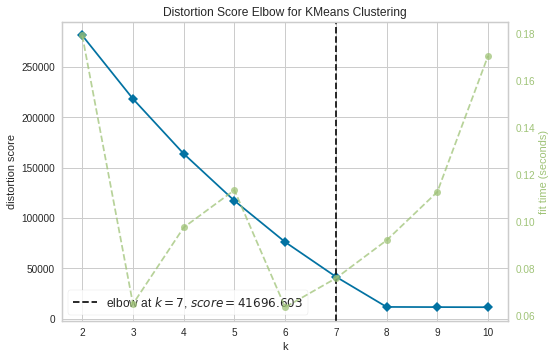

In [78]:
# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=0)

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(),K=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Initialiser l'objet

In [79]:
X_count_vec = df_count_vec.values

X_tsne_vec = TSNE(n_components=2,random_state=9).fit_transform(X_count_vec)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [80]:
# X = df_count_vec.values
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9)
kmeans.fit_transform(X_tsne_vec)

array([[74.18948  , 26.553764 , 17.319466 , ..., 47.58284  , 42.8255   ,
        40.13573  ],
       [56.267895 , 10.18289  , 15.325125 , ..., 40.56915  , 24.8107   ,
        50.59135  ],
       [54.217484 , 11.600695 , 15.836681 , ..., 39.34472  , 22.884447 ,
        50.726894 ],
       ...,
       [44.98874  , 42.948586 , 21.52272  , ..., 12.126882 , 23.151628 ,
        24.31894  ],
       [46.16526  , 45.22849  , 23.34974  , ..., 12.220644 , 25.586483 ,
        22.11727  ],
       [45.758156 , 43.471527 , 21.781868 , ..., 12.5401125, 24.108238 ,
        23.360048 ]], dtype=float32)

Trouver les clusters dans l'ensemble des données

In [81]:
df_category['Cluster'] = kmeans.labels_

ARI score suite à la lémmatisation

In [82]:
print('ARI score CountVectorizer: ',adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat']))

ARI score CountVectorizer:  0.4696408426525698


## **<font/>Segmentation K-Means - CountVectorizer (Stemming)**

---



In [83]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()

x = count_vec.fit_transform(df_category['stemmer'])

In [84]:
df_count_vec = pd.DataFrame(x.toarray(), columns=count_vec.get_feature_names())
df_count_vec

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



aaa  aapno  aari  aarika  abil  ...  zipper  zone  zoom  zora  zyxel
0       0      0     0       0     0  ...       0     0     0     0      0
1       0      0     0       0     0  ...       0     0     0     0      0
2       0      0     0       0     0  ...       0     0     0     0      0
3       0      0     0       0     0  ...       0     0     0     0      0
4       0      0     0       0     0  ...       0     0     0     0      0
...   ...    ...   ...     ...   ...  ...     ...   ...   ...   ...    ...
1045    0      0     0       0     0  ...       0     0     0     0      0
1046    0      0     0       0     0  ...       0     0     0     0      0
1047    0      0     0       0     0  ...       0     0     0     0      0
1048    0      0     0       0     0  ...       0     0     0     0      0
1049    0      0     0       0     0  ...       0     0     0     0      0

[1050 rows x 3972 columns]

Initialiser l'objet

In [85]:
X_count_vec = df_count_vec.values

X_tsne_vec = TSNE(n_components=2,random_state=9).fit_transform(X_count_vec)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [86]:
# X = df_count_vec.values
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9)
kmeans.fit_transform(X_tsne_vec)

array([[17.0398   , 48.917896 , 55.636307 , ..., 31.389196 , 59.056828 ,
        26.570868 ],
       [21.588888 , 35.93282  , 64.65666  , ...,  8.259404 , 29.67214  ,
        15.500638 ],
       [23.326485 , 35.174126 , 65.44462  , ...,  7.830481 , 27.188398 ,
        17.20571  ],
       ...,
       [20.083284 , 11.938612 , 42.09255  , ..., 18.21107  , 38.940697 ,
        40.089447 ],
       [21.335728 , 10.5900755, 39.816933 , ..., 20.798939 , 40.996105 ,
        42.493313 ],
       [20.610945 , 11.314412 , 41.43516  , ..., 19.06243  , 39.492596 ,
        40.928616 ]], dtype=float32)

Trouver les clusters dans l'ensemble des données

In [87]:
df_category['Cluster'] = kmeans.labels_

ARI score suite à la Stemming

In [88]:
print('ARI score CountVectorizer (Stemming): ',adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat']))

ARI score CountVectorizer (Stemming):  0.37813019212275206


## **<font/>Word2Vec  (Lemmatisation)**

---



Initialiser le modèle Word2Vec

In [274]:
model = Word2Vec(sentences=df_category['tokenize'], size=5, window=10, workers=1, seed=20)

Le nombre de corpus

In [275]:
model.corpus_count

1050

La taille du vocabulaire de notre modèle

In [276]:
print('Taille du vocabulaire:', len(model.wv.vocab))

Taille du vocabulaire: 1394


Les mots similaires du mot 'baby' 

In [277]:
model.most_similar('baby')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[("girl's", 0.9991181492805481),
 ("boy's", 0.9989409446716309),
 ('shirt', 0.9975341558456421),
 ('denim', 0.9969353079795837),
 ('dress', 0.9964854717254639),
 ('occasion', 0.9948237538337708),
 ('neck', 0.9922580122947693),
 ('sleepsuit', 0.9921181201934814),
 ('half', 0.9919247031211853),
 ('general', 0.9915767908096313)]

Fonction pour créer un vecteur par ligne en faisant la moyenne de ses vecteurs de mots. 

In [278]:
def vectorize(list_of_docs, model):

    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model:
                try:
                    vectors.append(model[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(df_category['tokenize'], model=model)
len(vectorized_docs), len(vectorized_docs[0])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use se

(1050, 5)

Initialiser l'objet TSNE

In [279]:
X_Word2Vec = vectorized_docs

X_tsne_Word2Vec = TSNE(n_components=2,random_state=9).fit_transform(X_Word2Vec)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Initialiser l'objet

In [284]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9)
kmeans.fit_transform(X_tsne_Word2Vec)

array([[53.470787 ,  9.778884 , 46.018925 , ..., 26.92573  , 20.197155 ,
        50.009624 ],
       [36.42342  , 29.212605 , 39.3291   , ...,  6.5484586, 38.314716 ,
        40.749622 ],
       [47.613758 , 13.748903 , 44.960808 , ..., 21.676168 , 25.666273 ,
        45.22504  ],
       ...,
       [ 3.2471647, 56.820625 , 71.41656  , ..., 37.584404 , 73.47687  ,
        18.192709 ],
       [ 1.3324039, 57.028294 , 70.08918  , ..., 36.599506 , 73.24461  ,
        19.937674 ],
       [14.594612 , 47.287163 , 71.34327  , ..., 35.85745  , 65.89012  ,
         8.612107 ]], dtype=float32)

Trouver les clusters dans l'ensemble de données

In [285]:
df_category['Cluster'] = kmeans.labels_

Vérifier les centroïdes

In [286]:
centroid = kmeans.cluster_centers_

Ari score

In [287]:
adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat'])

0.2162860660496164

## **<font/>Word2Vec (Stemming)**

---



Initialiser le modèle Word2Vec

In [264]:
model = Word2Vec(sentences=df_category['tokenize_stem'], size=5, window=10, workers=1, seed=20)

Le nombre de corpus

In [265]:
model.corpus_count

1050

La taille du vocabulaire de notre modèle

In [266]:
print('Taille du vocabulaire:', len(model.wv.vocab))

Taille du vocabulaire: 1368


Les mots similaires du mot 'baby' 

In [267]:
model.most_similar('watch')
# model.wv.vocab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[('men', 0.9981652498245239),
 ('analog', 0.994093656539917),
 ('india', 0.9903076887130737),
 ('digit', 0.988905131816864),
 ('jumpsuit', 0.9868178367614746),
 ('women', 0.9808517694473267),
 ('maxima', 0.9796147346496582),
 ('sport', 0.9793748259544373),
 ('strap', 0.9764485955238342),
 ('perucci', 0.9762815833091736)]

Fonction pour créer un vecteur par ligne en faisant la moyenne de ses vecteurs de mots. 

In [268]:
def vectorize(list_of_docs, model):

    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model:
                try:
                    vectors.append(model[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
vectorized_docs = vectorize(df_category['tokenize'], model=model)
len(vectorized_docs), len(vectorized_docs[0])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launche

Initialiser l'objet TSNE

In [269]:
X_Word2Vec = vectorized_docs

X_tsne_Word2Vec = TSNE(n_components=2,random_state=9).fit_transform(X_Word2Vec)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Initialiser l'objet

In [270]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9)
kmeans.fit_transform(X_tsne_Word2Vec)

array([[59.885624 , 59.841797 ,  9.086565 , ..., 67.750656 , 20.487726 ,
        40.698444 ],
       [52.46707  , 70.02197  , 23.534613 , ..., 64.71412  ,  4.979925 ,
        34.234955 ],
       [56.804623 , 61.05459  , 11.199255 , ..., 65.57934  , 16.82409  ,
        37.620255 ],
       ...,
       [17.160393 , 54.955254 , 40.004303 , ..., 28.588789 , 40.304104 ,
         2.3726683],
       [22.591127 , 55.54059  , 35.17398  , ..., 34.08248  , 34.65422  ,
         3.4480321],
       [11.339694 , 54.69684  , 45.860752 , ..., 22.099403 , 47.090263 ,
         9.185087 ]], dtype=float32)

Trouver les clusters dans l'ensemble de données

In [271]:
df_category['Cluster'] = kmeans.labels_

Vérifier les centroïdes

In [272]:
centroid = kmeans.cluster_centers_

Ari score

In [273]:
adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat'])

0.21846249350259397

## **<font/>Transfer Learning - glove-wiki-gigaword-30**

---


Method 2: Using word2vec 'gensim'

In [109]:
# glove_gensim  = api.load('glove-wiki-gigaword-100') # cela téléchargerait un vecteur avec une dimension de 100
# glove_gensim = api.load("glove-twitter-25")
glove_gensim  = api.load('glove-wiki-gigaword-300') # cela téléchargerait un vecteur avec une dimension de 300

[==================================================] 100.0% 376.1/376.1MB downloaded


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information



Les mots similaires du mot 'computer'

In [212]:
glove_gensim.most_similar("computer",topn=10)

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[('computers', 0.8248153924942017),
 ('software', 0.733441948890686),
 ('pc', 0.6240140199661255),
 ('technology', 0.6198545694351196),
 ('computing', 0.6178765296936035),
 ('laptop', 0.5955508947372437),
 ('internet', 0.5857782363891602),
 ('ibm', 0.5825320482254028),
 ('systems', 0.574499249458313),
 ('hardware', 0.5728795528411865)]

In [215]:
print('La taille du vocabulaire:', len(glove_gensim.vocab))

La taille du vocabulaire: 400000


In [218]:
glove_gensim['key'] 

array([ 0.20243  ,  0.088567 ,  0.047715 , -0.67813  ,  0.40773  ,
       -0.23219  , -0.31256  , -0.011064 , -0.61183  , -1.55     ,
       -0.47035  , -0.27919  , -0.17414  ,  0.25522  , -0.018822 ,
       -0.22347  , -0.035231 , -0.31716  , -0.087002 ,  0.23197  ,
       -0.28148  , -0.19469  ,  0.35849  , -0.42888  , -0.17925  ,
       -0.20885  , -0.34705  ,  0.24555  , -0.28239  ,  0.16144  ,
        0.12281  ,  0.19155  , -0.57951  ,  0.47977  , -0.73023  ,
        0.15449  ,  0.30061  ,  0.34768  , -0.52549  , -0.59526  ,
       -0.035149 , -0.24679  , -0.48577  ,  0.014064 , -0.65129  ,
        0.19733  , -0.20479  ,  0.040999 , -0.74477  ,  0.37334  ,
        0.56781  ,  0.010342 , -0.079889 , -0.054447 , -0.34666  ,
        0.025979 ,  0.17054  ,  0.19092  ,  0.22037  ,  0.40235  ,
        0.29537  ,  0.32554  , -0.15559  ,  0.12339  ,  0.10398  ,
        0.0062016,  0.30967  ,  0.3016   ,  0.12061  ,  0.27346  ,
       -0.583    ,  0.34996  ,  0.11905  , -0.40387  ,  0.1332

Créer un vecteur par ligne en faisant la moyenne de ses vecteurs de mots. 

In [219]:
vectorized_docs_glove = vectorize(df_category['tokenize'], model=glove_gensim)
len(vectorized_docs_glove), len(vectorized_docs_glove[0])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call

(1050, 300)

Initialiser l'objet TSNE

In [116]:
X_glove = vectorized_docs_glove

X_tsne_glove = TSNE(n_components=2,random_state=9).fit_transform(X_glove)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [117]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=64)
kmeans.fit_transform(X_tsne_glove)

df_category['Cluster'] = kmeans.labels_
adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat'])

0.38560443816086964

Projection des données (glove-wiki-gigaword-300)

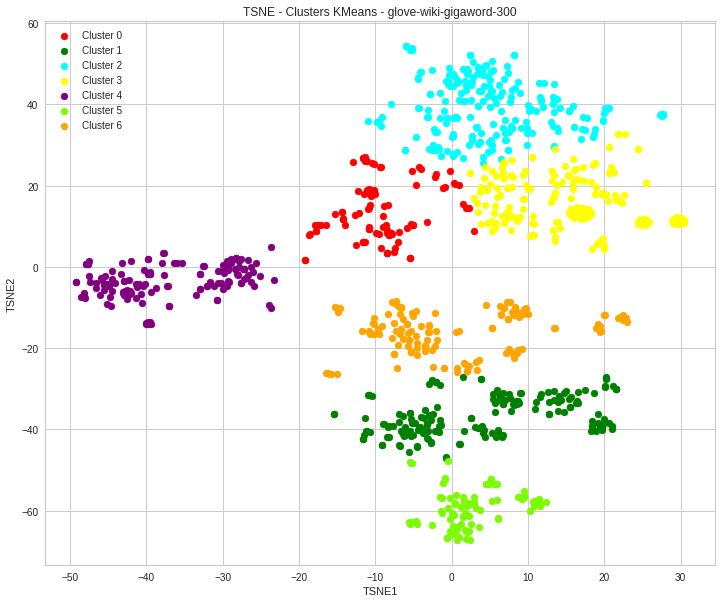

In [118]:
fig = plt.figure(figsize=(12,10))

Colors = ["red", "green", "aqua", 'yellow', 'purple', 'lawngreen', 'orange']

target_name = []
j=[]
for i in range(df_category['Cluster_cat'].unique().size):
  target_name.append('Cluster %i'%i)
  j.append(i)

df_category['Color'] = df_category['Cluster_cat'].map(lambda p: Colors[p])

for color, i, target_name in zip(Colors, j, target_name):
  plt.scatter(x = X_tsne_glove[df_category['Cluster']==i,0], y = X_tsne_glove[df_category['Cluster']==i,1], color=Colors[i], label=target_name)

plt.legend()

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSNE - Clusters KMeans - glove-wiki-gigaword-300')

plt.show()

# **<font color='blue'/>Prétraitement des Images**

---


## **<font/>ORB**

---

Initialiser ORB

In [119]:
orb = cv2.ORB_create(1500)

Extraction des features des images

In [120]:
dico = []
    
def step1():
    
  for leaf in df_category.uniq_id:
    try:
      # Chargement de l'image
      img = cv2.imread(img_path + str(leaf) + ".jpg")
      # convert to RGB
      img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      # Egalisation adaptative de l'image
      clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
      img = clahe.apply(img)

      # Redimensionnement de l'image
      img = cv2.resize(img, (224, 224))

      kp, des = orb.detectAndCompute(img, None)
    
      for d in des:
        dico.append(d)
    except: continue 
  return dico

deco = step1() # len(deco)

In [121]:
len(deco)

891900

Exemple d'image avec les transformations effectuées

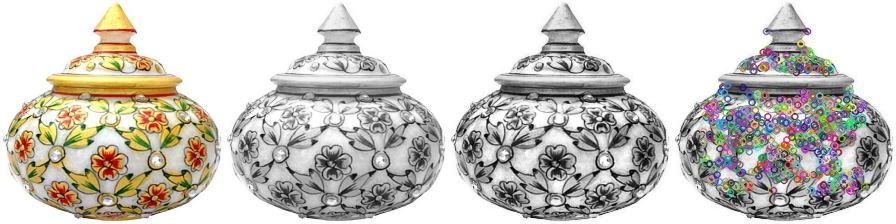

In [122]:
from google.colab.patches import cv2_imshow
# img = cv2.imread(img_path+'705b90361aeda1849a728d80625a78a9.jpg')
# img = cv2.imread(img_path+'908cc351957d02f72f60916006c531ba.jpg')
img = cv2.imread(img_path+'8f41774c16a931d71fcf01f8fee171e0.jpg')
# img = cv2.imread(img_path+'55ce1309b69e1912d2fd60a3ee3f351b.jpg')

# Redimensionnement de l'image
img1 = cv2.resize(img, (224, 224)) 

# convertir l'image colorimétrique BGR en espace colorimétrique GRIS
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


#L'égalisation adaptative de l'image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img3 = clahe.apply(img2)

img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
img3 = cv2.cvtColor(img3, cv2.COLOR_GRAY2BGR)

# Extraction des descripteurs
kp, des = orb.detectAndCompute(img3, None)
img4 = cv2.drawKeypoints(img3,kp,None)

# plt.imshow(img)

# Afficher les images horizontalement
imstack = np.hstack((img1, img2,img3,img4))
cv2_imshow(imstack)


In [123]:
# Clustering
from sklearn.cluster import KMeans
import os

def step2():
    k = 7
    kmeans = KMeans(n_clusters=k,n_init=20, verbose=1, random_state=9).fit(deco)
    # kmeans = KMeans(n_clusters=7, init='k-means++', random_state=9).fit(deco)
    return kmeans     

kmeans = step2()
# kmeans.labels_.shape # (891903,)
# np.unique(kmeans.labels_) # [0, 1, 2, 3, 4, 5, 6]
# kmeans.cluster_centers_

Initialization complete
Iteration 0, inertia 204938974113.0
Iteration 1, inertia 132175705432.3829
Iteration 2, inertia 128647540153.56375
Iteration 3, inertia 127579993664.68988
Iteration 4, inertia 127145851135.42494
Iteration 5, inertia 126901722561.0254
Iteration 6, inertia 126729054921.63446
Iteration 7, inertia 126595250458.49417
Iteration 8, inertia 126490025576.03226
Iteration 9, inertia 126407006995.6149
Iteration 10, inertia 126340115051.80965
Iteration 11, inertia 126284368719.7768
Iteration 12, inertia 126234972933.33356
Iteration 13, inertia 126189054617.91812
Iteration 14, inertia 126144226334.18134
Iteration 15, inertia 126100364796.25409
Iteration 16, inertia 126056534403.52243
Iteration 17, inertia 126012646048.4298
Iteration 18, inertia 125969119341.53891
Iteration 19, inertia 125927172541.2916
Iteration 20, inertia 125888403966.98773
Iteration 21, inertia 125854587137.2113
Iteration 22, inertia 125823955910.09055
Iteration 23, inertia 125797642539.14069
Iteration 24,

In [124]:
# std_scaler = StandardScaler()
# deco_std_scaler = std_scaler.fit_transform(deco)
# deco_std_scaler = np.array(deco_std_scaler)
# tsne = TSNE(n_components=2, learning_rate='auto', init='random')
# # tsne.fit(deco_std_scaler)
# tsne = TSNE().fit_transform(PCA(n_components=32).fit_transform(deco))

In [125]:
# representation clusteing en 2 dim par PCA
std_scaler = StandardScaler()
deco_std_scaler = std_scaler.fit_transform(deco)
deco_std_scaler = np.array(deco_std_scaler)
pca = PCA(n_components=2)
pca.fit(deco_std_scaler)
X_pca = pca.transform(deco_std_scaler)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional informatio

No handles with labels found to put in legend.


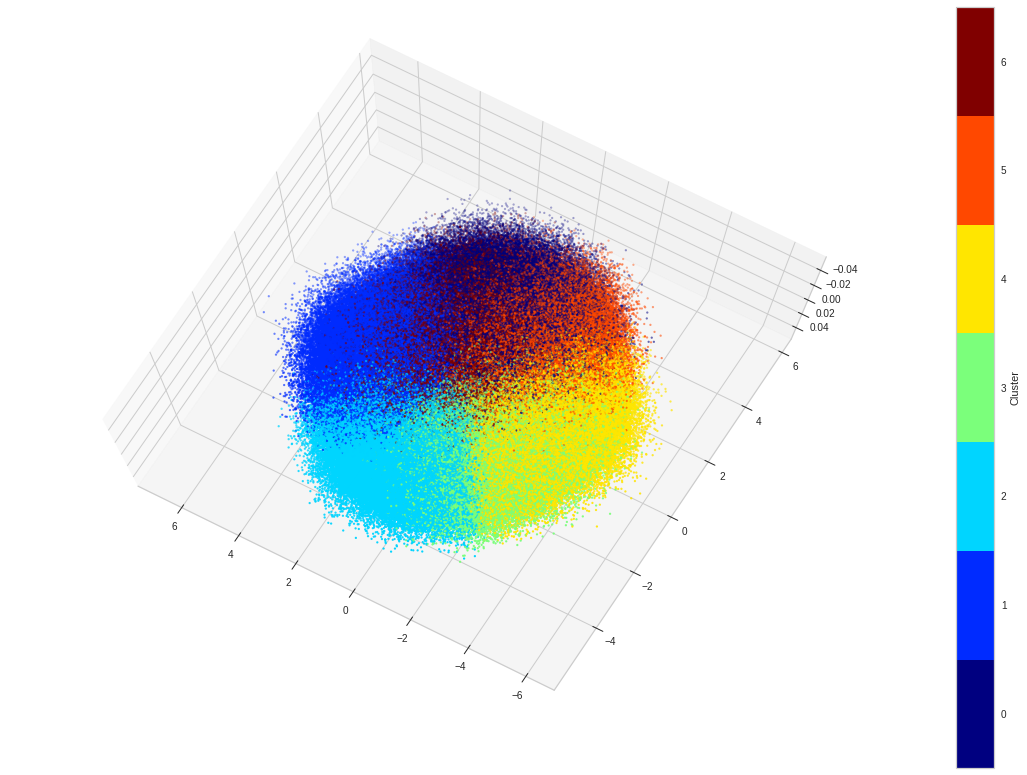

In [126]:
from numpy.core.fromnumeric import size
from mpl_toolkits.mplot3d import Axes3D # module 3D de Matplotlib

fig = plt.figure(figsize=(20,14))
ax = plt.axes(projection='3d') # Création d'un objet "axe 3D"

plt.scatter(X_pca[:,0], X_pca[:,1], s=5, linewidths=0.01, c=kmeans.labels_,cmap=plt.cm.get_cmap('jet', 7))
plt.colorbar(ticks=range(7), label='Cluster')
plt.clim(vmin = -0.5, vmax = 6.5)

ax.view_init(260,60)
plt.legend()

Text(0, 0.5, 'PCA2')

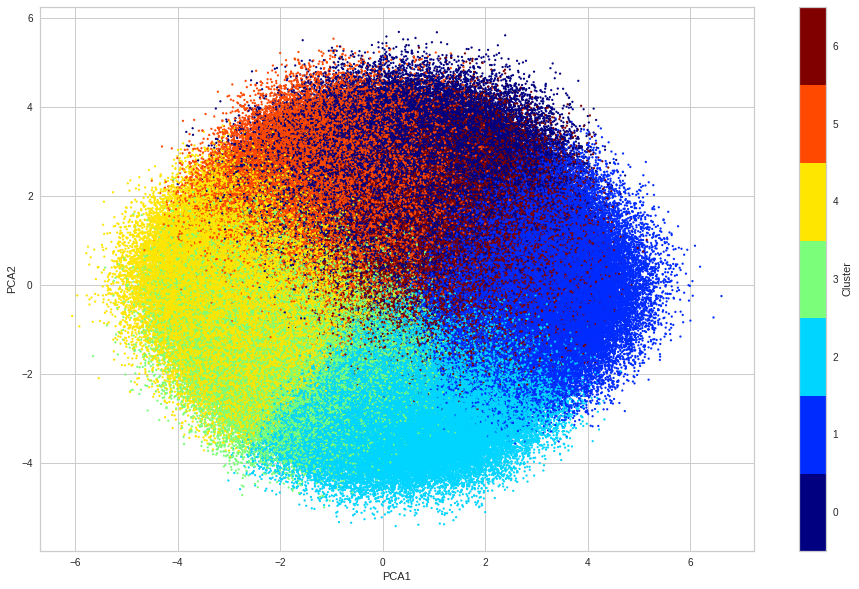

In [127]:
import matplotlib.style
# plt.style.use('classic')
plt.figure(figsize=(16,10))

# color=['red', 'green', 'blue', 'cyan', 'yellow', 'lightgreen', 'lightblue']

plt.scatter(X_pca[:,0], X_pca[:,1], s=5, linewidths=0.01, c=kmeans.labels_,cmap=plt.cm.get_cmap('jet', 7))
plt.colorbar(ticks=range(7), label='Cluster')
plt.clim(vmin = -0.5, vmax = 6.5)

plt.xlabel('PCA1')
plt.ylabel('PCA2')

Prédiction de la catégorie des images

Catégorie prédite 2


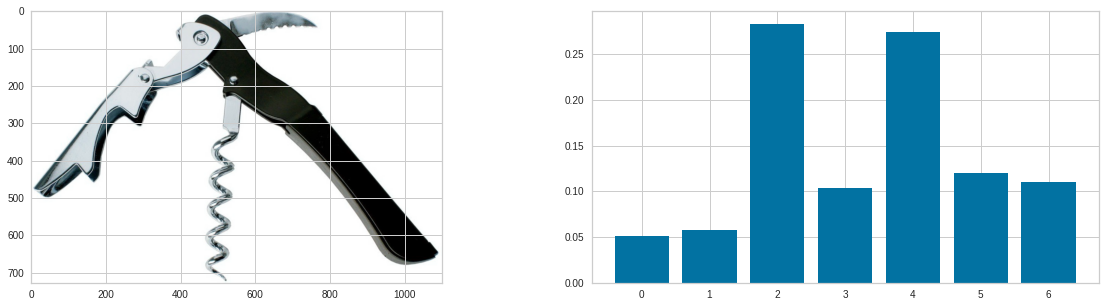

In [128]:
plt.figure(figsize=(20,5))

img = cv2.imread(img_path+'06fdaa2b03d70da4358311d260456729.jpg')
kp, des = orb.detectAndCompute(img, None)
plt.subplot(121)
plt.imshow(img)

histo = np.zeros(7)
nkp = np.size(kp)

histo_list=[]
for d in des:
    # dc.append(d)
    idx = kmeans.predict([d])
    histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
    histo_list.append(histo)
    pred_categ = np.argmax(histo_list[0], axis=0)

plt.subplot(122)
plt.bar([0,1,2,3,4,5,6],histo_list[0])

print('Catégorie prédite', pred_categ)

In [129]:
len(kmeans.labels_)

891900

In [130]:
# predicttion categorie image
base_dir ='Flipkart/Images'
train_dir = 'Data/train/'
test_dir = 'Data/test/'

def predict_img(image):
  label = ['BabyCare', 'BeautyandPersonalCare', 'Computers', 'HomeDecor&FestiveNeeds',
         'HomeFurnishing', 'Kitchen&Dining', 'Watches']
  img = cv2.imread(image)
  kp, des = orb.detectAndCompute(img, None)

  histo = np.zeros(7)
  nkp = np.size(kp)

  histo_list=[]
  for d in des:
      # dc.append(d)
      idx = kmeans.predict([d])
      histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
      histo_list.append(histo)
      pred_categ = np.argmax(histo_list[0], axis=0)
  plt.imshow(img)
  print(label[pred_categ])
  plt.bar([0,1,2,3,4,5,6],histo_list[0])

Computers


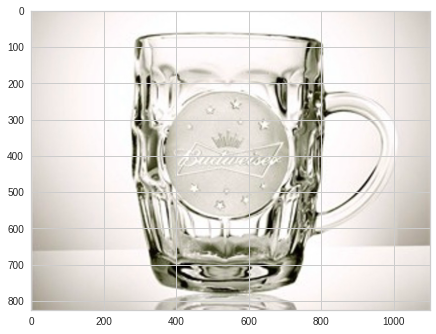

In [131]:
predict_img(train_dir+'Kitchen  Dining/Kitchen  Dining120.jpg')

In [132]:
# predicttion categorie image
def predict_cluster(image):
  img = cv2.imread(image)
  kp, des = orb.detectAndCompute(img, None)

  histo = np.zeros(7)
  nkp = np.size(kp)

  histo_list=[]
  for d in des:
      # dc.append(d)
      idx = kmeans.predict([d])
      histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly
      histo_list.append(histo)
      pred_categ = np.argmax(histo_list[0], axis=0)
  return pred_categ

Identifier le cluster de chaque image

In [133]:
cluster_img =[]
for i in df_category.uniq_id:
  img = img_path + str(i) + ".jpg"
  cluster_img.append(predict_cluster(img))

In [134]:
len(cluster_img)

1050

affecter les clusters

In [135]:
df_category['Cluster'] = cluster_img
df_category['Cluster'] .value_counts()

2    358
0    292
1    135
3     78
5     66
4     66
6     55
Name: Cluster, dtype: int64

Ari score

In [136]:
adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat'])

0.019263112647026667

Echantillon d'images par catégorie

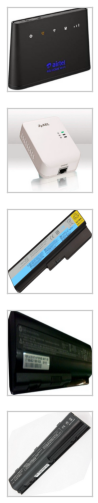

In [137]:
name_cat= 'Computers'
cat_array = df_category['main_category'].unique()

img_cat = train_dir + str(name_cat)+'/'+str(name_cat)
plt.figure(5, figsize=(14,9))
for leaf in range(5):
  n = np.random.randint(0,134)
  img = cv2.imread(img_cat + str(n) + ".jpg")
  # Redimensionnement de l'image
  img = cv2.resize(img, (224, 224))
  # img = np.concatenate((img, img), axis=1)
  ax = plt.subplot(5, 1, leaf+1)
  # plt.title(cat_array[j])
  plt.imshow(img)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

## **<font/>Transfer Learning - InceptionV3**

---

Initialiser notre modèle InceptionV3 

In [138]:
model_inception = InceptionV3(input_shape = (299,299,3),
                               include_top  = False,
                               weights      = 'imagenet')

# Fixer les paramètres
for layer in model_inception.layers:
  layer.trainable = False

87924736/87910968 [==============================] - 2s 0us/step


Les informations sur le modèle InceptionV3

In [139]:
model_inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

Création d'un nouveau modèle

In [140]:
input_layer = model_inception.layers[0].input
last_output = model_inception.layers[-2].output

New_model = Model(inputs=input_layer, outputs=last_output)

Compiler le nouveau modèle

In [141]:
New_model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['acc'])

New_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Extraction des features de nos images avec le nouveau modèle "New_model"

In [142]:
# Extraction features
inception_feature_list=[]
for leaf in df_category.uniq_id:
  img=image.load_img(img_path + str(leaf) + ".jpg",target_size=(299,299))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  inception_feature = New_model.predict(img_data)
  inception_feature_np = np.array(inception_feature)
  inception_feature_list.append(inception_feature_np.flatten())

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



Initialiser et entraîner le modèle de clustering K-Means

In [143]:
inception_feature_array = np.array(inception_feature_list)
kmeans = KMeans(n_clusters=7,n_init=20, random_state=9).fit(inception_feature_array)

Réduction de dimension TSNE

In [144]:
# Réduction de dimension TSNE
X_tsne = TSNE(n_components=2,random_state=9).fit_transform(inception_feature_array)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Projection des données en 2D

Text(0, 0.5, 'TSNE2')

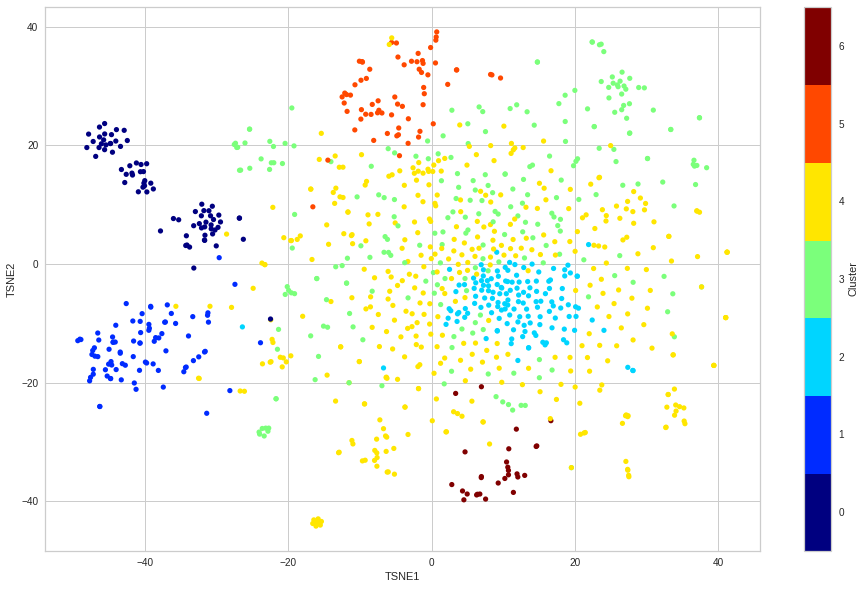

In [145]:
import matplotlib.style
# plt.style.use('classic')
plt.figure(figsize=(16,10))

plt.scatter(X_tsne[:,0], X_tsne[:,1], s=5, linewidths=3, c=kmeans.labels_,cmap=plt.cm.get_cmap('jet', 7))
plt.colorbar(ticks=range(7), label='Cluster')
plt.clim(vmin = -0.5, vmax = 6.5)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

Affecter les clusters

In [146]:
df_category['Cluster'] = kmeans.labels_

Calculer le ARI score

In [147]:
adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat'])

0.24741966268104099

## **<font/>Transfer Learning - VGG16**

---

Initialiser notre modèle vgg16 

In [148]:
from tensorflow.keras.applications.vgg16 import preprocess_input
model_VGG16 = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

58900480/58889256 [==============================] - 1s 0us/step


Fixer tous les paramètres

In [149]:
for layer in model_VGG16.layers:
  layer.trainable = False

Les informations sur le modèle VGG16

In [150]:
model_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Création d'un nouveau modèle

In [151]:
input_layer = model_VGG16.input
last_output = model_VGG16.layers[-2].output

New_model_vgg = Model(inputs=input_layer, outputs=last_output)

Compiler le nouveau modèle

In [152]:
New_model_vgg.compile(optimizer = 'sgd', 
                      loss = 'categorical_crossentropy', 
                      metrics = ['accuracy'])

New_model_vgg.summary() 

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Extraction features

In [153]:
# Extraction features
vgg_feature_list=[]
for leaf in df_category.uniq_id:
  img = image.load_img(img_path + str(leaf) + ".jpg",target_size=(224,224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  vgg_feature = New_model_vgg.predict(img_data)
  vgg_feature_np = np.array(vgg_feature)
  vgg_feature_list.append(vgg_feature_np.flatten())

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



Initialiser et entraîner le modèle de clustering K-Means

In [154]:
vgg_feature_array = np.array(vgg_feature_list)
kmeans = KMeans(n_clusters=7,n_init=20, random_state=9).fit(vgg_feature_array)

Réduction de dimension TSNE

In [155]:
# Réduction des dimensions TSNE
X_tsne = TSNE(n_components=2,random_state=9).fit_transform(vgg_feature_array)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Projection des données en 2D

Text(0, 0.5, 'TSNE2')

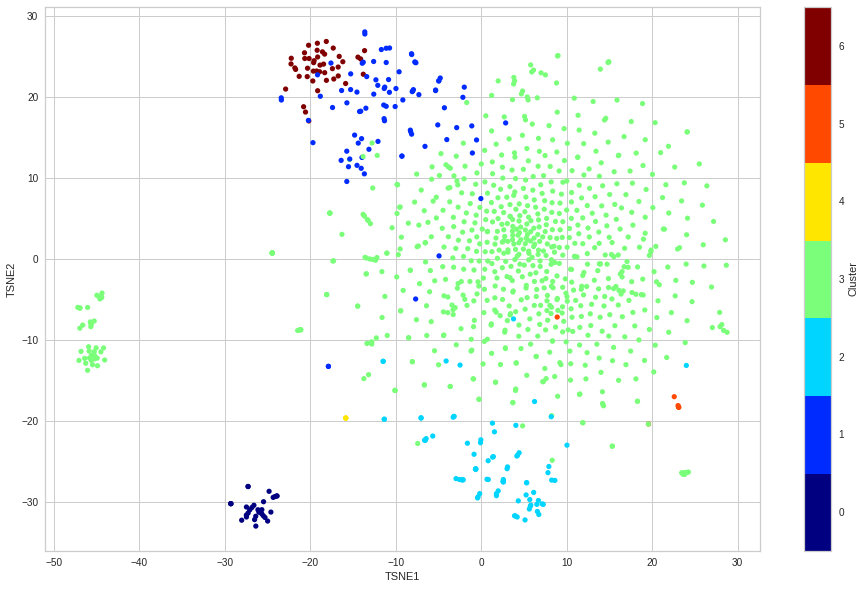

In [156]:
import matplotlib.style
# plt.style.use('classic')
plt.figure(figsize=(16,10))

plt.scatter(X_tsne[:,0], X_tsne[:,1], s=5, linewidths=3, c=kmeans.labels_,cmap=plt.cm.get_cmap('jet', 7))
plt.colorbar(ticks=range(7), label='Cluster')
plt.clim(vmin = -0.5, vmax = 6.5)

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

Affecter les clusters

In [157]:
df_category['Cluster'] = kmeans.labels_

Calculer le ARI score

In [158]:
adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat'])

0.0939676908038251

## **<font/>Transfer Learning InceptionV3 - Supervisé**

---

Initialiser le modèle pré-entraîné InceptionV3 

In [197]:
pre_trained_model = InceptionV3(input_shape = (299,299,3),
                               include_top  = False,
                               weights      = 'imagenet')

for layer in pre_trained_model.layers:
      layer.trainable = False
      
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 17, 17, 768)


Définir le nouveau modèle

In [198]:
# Convertir la couche de sortie en une dimension
x = layers.Flatten()(last_output)

# Ajouter un taux d'abandon de 0,2
x = layers.Dropout(0.2)(x)
               
# Ajouter la dernière couche
x = layers.Dense (7, activation = 'softmax')(x)           

model = Model(pre_trained_model.input, x)
 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_192 (Conv2D)            (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_192 (Batch  (None, 149, 149, 32  96         ['conv2d_192[0][0]']             
 Normalization)                 )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



 batch_normalization_203 (Batch  (None, 35, 35, 32)  96          ['conv2d_203[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_193 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_197[0][0]']
                                                                                                  
 activation_195 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_199[0][0]']
                                                                                                  
 activation_198 (Activation)    (None, 35, 35, 96)   0           ['batch_normalization_202[0][0]']
                                                                                                  
 activation_199 (Activation)    (None, 35, 35, 32)   0           ['batch_normalization_203[0][0]']
          

Définir nos répertoires test et validation

In [199]:
# Définr les répertoire
validation_dir = test_dir

# Augmenter les données avec ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

# Les données de validation ne doivent pas être augmentées !
test_datagen = ImageDataGenerator(rescale=1/255)

# Images d'entraînement de flux par lots de 20 à l'aide du générateur train_datagen
train_generator = train_datagen.flow_from_directory(train_dir,  # Il s'agit du répertoire source des images d'entraînement
                                                    target_size=(299,299), 
                                                    batch_size=20,
                                                    class_mode='categorical')

# Images de validation de flux par lots de 20 à l'aide du générateur test_datagen
validation_generator = test_datagen.flow_from_directory(validation_dir,  # Il s'agit du répertoire source des images de validation
                                                         target_size=(299,299), 
                                                         batch_size=20,
                                                         class_mode='categorical')


Found 945 images belonging to 7 classes.
Found 105 images belonging to 7 classes.


Définir une classe de rappel qui arrête l'entraînement une fois que la précision atteint 99,0 %

In [200]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nAtteint une précision de 99,0 %, annulant l'entraînement!")
            self.model.stop_training = True 
            
# L'entraînement s'arrête avec une précision de 99 %
callbacks = myCallback()
history = model.fit_generator(train_generator,
                             validation_data = validation_generator,
                             # steps_per_epoch = 10,
                             epochs = 10,
                             # validation_steps = 10,
                             verbose = 1,
                             callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/10
38/48 [======================>.......] - ETA: 42s - loss: 1.4040 - acc: 0.5302

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning:

Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.



48/48 [==============================] - 239s 5s/step - loss: 1.3154 - acc: 0.5566 - val_loss: 1.2616 - val_acc: 0.5429
Epoch 2/10
48/48 [==============================] - 230s 5s/step - loss: 0.7204 - acc: 0.7788 - val_loss: 1.2037 - val_acc: 0.5333
Epoch 3/10
48/48 [==============================] - 247s 5s/step - loss: 0.6020 - acc: 0.8127 - val_loss: 1.2973 - val_acc: 0.6000
Epoch 4/10
48/48 [==============================] - 251s 5s/step - loss: 0.5076 - acc: 0.8487 - val_loss: 1.4955 - val_acc: 0.5619
Epoch 5/10
48/48 [==============================] - 225s 5s/step - loss: 0.4945 - acc: 0.8392 - val_loss: 1.4048 - val_acc: 0.6095
Epoch 6/10
48/48 [==============================] - 225s 5s/step - loss: 0.4217 - acc: 0.8571 - val_loss: 1.3104 - val_acc: 0.5905
Epoch 7/10
48/48 [==============================] - 258s 5s/step - loss: 0.3739 - acc: 0.8847 - val_loss: 1.3602 - val_acc: 0.5714
Epoch 8/10
48/48 [==============================] - 233s 5s/step - loss: 0.3567 - acc: 0.8847 

Afficher l'historique d'entraînement.

Graphique des valeurs de précision et de perte pour chaque Epoch.

<Figure size 576x396 with 0 Axes>

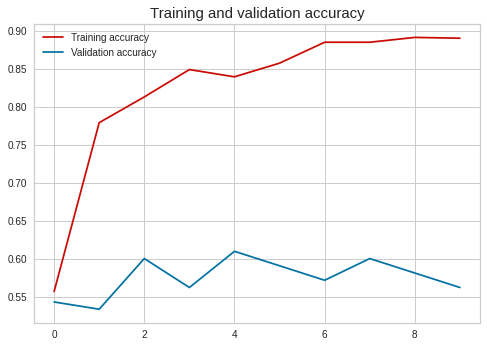

<Figure size 576x396 with 0 Axes>

In [210]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy', fontsize=15)
plt.legend(loc=0)
plt.figure()

Prédiction des classes de la partie validation 

In [203]:
pred= np.argmax(model.predict(validation_generator), axis=1)

Matrice de confusion - vérifier l'exactitude de chaque classe

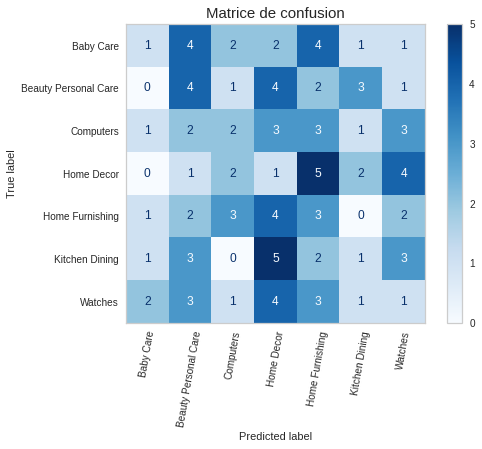

In [211]:
# Matrice de confusion - vérifier l'exactitude de chaque classe
labels = ['Baby Care',  'Beauty Personal Care', 'Computers','Home Decor', 
          'Home Furnishing','Kitchen Dining', 'Watches']

cm = confusion_matrix(validation_generator.classes, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=80)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

Classification Report

In [166]:
print('Classification Report')
print(classification_report(validation_generator.classes, pred, target_names=labels))

Classification Report
                      precision    recall  f1-score   support

           Baby Care       0.11      0.07      0.08        15
Beauty Personal Care       0.25      0.13      0.17        15
           Computers       0.25      0.20      0.22        15
          Home Decor       0.15      0.33      0.20        15
     Home Furnishing       0.00      0.00      0.00        15
      Kitchen Dining       0.25      0.27      0.26        15
             Watches       0.12      0.13      0.13        15

            accuracy                           0.16       105
           macro avg       0.16      0.16      0.15       105
        weighted avg       0.16      0.16      0.15       105



# **<font color='blue'/>Combinaison Traitement visuelle et textuelle**

---

Données visuelles

In [192]:
df_inception = pd.DataFrame(inception_feature_array)
df_inception

0         1         2      ...     12285     12286     12287
0     0.339561  0.000000  0.000000  ...  0.000000  0.142896  0.000000
1     0.000000  0.320075  0.000000  ...  0.191559  0.000000  0.000000
2     0.359368  0.000000  0.000000  ...  0.000000  0.367610  0.000000
3     0.000000  0.000000  0.771610  ...  0.021843  0.000000  0.694687
4     0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000
...        ...       ...       ...  ...       ...       ...       ...
1045  1.757628  0.000000  0.643416  ...  0.000000  0.000000  0.000000
1046  0.000000  0.000000  0.000000  ...  0.969747  0.000000  0.000000
1047  0.469423  0.000000  0.000000  ...  0.000000  0.000000  0.491222
1048  0.000000  0.000000  0.000000  ...  0.906166  0.000000  0.000000
1049  0.000000  0.000000  0.012709  ...  0.000000  0.703763  0.000000

[1050 rows x 12288 columns]

Concaténer les données textuelles avec les données visuelle

In [193]:
df_img_text = pd.concat([df_tfidf,df_inception], axis=1)
df_img_text

aaa  aapno  aari  aarika  ...     12284     12285     12286     12287
0     0.0    0.0   0.0     0.0  ...  0.000000  0.000000  0.142896  0.000000
1     0.0    0.0   0.0     0.0  ...  0.345747  0.191559  0.000000  0.000000
2     0.0    0.0   0.0     0.0  ...  0.531730  0.000000  0.367610  0.000000
3     0.0    0.0   0.0     0.0  ...  0.000000  0.021843  0.000000  0.694687
4     0.0    0.0   0.0     0.0  ...  0.867662  0.000000  0.000000  0.000000
...   ...    ...   ...     ...  ...       ...       ...       ...       ...
1045  0.0    0.0   0.0     0.0  ...  0.000000  0.000000  0.000000  0.000000
1046  0.0    0.0   0.0     0.0  ...  0.000000  0.969747  0.000000  0.000000
1047  0.0    0.0   0.0     0.0  ...  0.358206  0.000000  0.000000  0.491222
1048  0.0    0.0   0.0     0.0  ...  0.000000  0.906166  0.000000  0.000000
1049  0.0    0.0   0.0     0.0  ...  0.000000  0.000000  0.703763  0.000000

[1050 rows x 16593 columns]

Initialiser l'objet TSNE

In [194]:
X = df_img_text.values
X_tsne = TSNE(n_components=2,random_state=9).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Projection des données

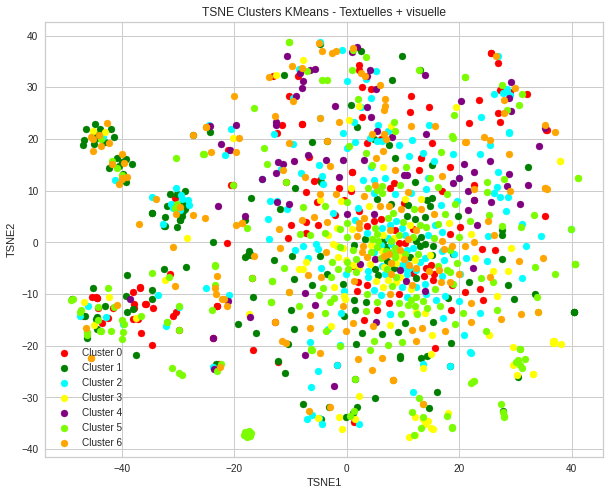

In [195]:
fig = plt.figure(figsize=(10,8))

Colors = ["red", "green", "aqua", 'yellow', 'purple', 'lawngreen', 'orange']

target_name = []
j=[]
for i in range(df_category['Cluster_cat'].unique().size):
  target_name.append('Cluster %i'%i)
  j.append(i)

df_category['Color'] = df_category['Cluster_cat'].map(lambda p: Colors[p])

for color, i, target_name in zip(Colors, j, target_name):
  plt.scatter(x = X_tsne[df_category['Cluster']==i,0], y = X_tsne[df_category['Cluster']==i,1], color=Colors[i], label=target_name)

plt.legend()

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('TSNE Clusters KMeans - Textuelles + visuelle')

plt.show()

Clustering et ARI score

In [196]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=101)
kmeans.fit_transform(df_img_text)
df_category['Cluster'] = kmeans.labels_
print('ARI score textuelle + visuelle : ',adjusted_rand_score(df_category['Cluster'], df_category['Cluster_cat']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



ARI score textuelle + visuelle :  0.3234031090092976
